# Midterm Checkpoint Report 


## 0. Model introduction [0]

The SIR model is one of the simplest compartmental models, and many models are derivatives of this basic form. The model consists of three compartments:<br>
S: The number of susceptible individuals. When a susceptible and an infectious individual come into "infectious contact", the susceptible individual contracts the disease and transitions to the infectious compartment.<br>
I: The number of infectious individuals. These are individuals who have been infected and are capable of infecting susceptible individuals.<br>
R: for the number of removed (and immune) or deceased individuals. These are individuals who have been infected and have either recovered from the disease and entered the removed compartment, or died. It is assumed that the number of deaths is negligible with respect to the total population. This compartment may also be called "recovered" or "resistant". The closed form equations of this model follows: <br>

$\frac{dS}{dt}=-\frac{b I S}{N}$ <br>
$\frac{dI}{dt}=\frac{b I S}{N}-k I$<br>
$\frac{dR}{dt}=k I$ <br>

with constraint <br>

$S(t)+I(t)+R(t)=N$ where $b,k$ are parameters to be determined and $N$ is the total population.

This model is reasonably predictive for infectious diseases that are transmitted from human to human, and where recovery confers lasting resistance, such as measles, mumps and rubella.


Spatial SIR model simulation. Each cell can infect its eight immediate neighbors.
These variables (S, I, and R) represent the number of people in each compartment at a particular time. To represent that the number of susceptible, infectious and removed individuals may vary over time (even if the total population size remains constant), we make the precise numbers a function of t (time): S(t), I(t) and R(t). For a specific disease in a specific population, these functions may be worked out in order to predict possible outbreaks and bring them under control.

## 1. Directory description 

In the GitHub page of Team0's final project, you could see a few directories:

__Initial Question Description and Given Resources:__ this directory contains all documents initially given to us when project was created;\
    a. SIR.md: introduction to how the SIR model works\
    b. final_report.md: instructions on writing the final report\
    c. midterm_checkpoint.md: instructions on completing the midterm checkpoint\
    d. spatial.md: introduction on how to do spatial modeling
    
    
__doc__: this directory contains reports written for the midterm and final checkpoints:\
    a. Midterm Checkpoint: contains the ipynb for mideterm report as well as graphs produced by the code\
    b. Final Checkpoint: contains the ipynb for final report as well as plots produced by the code. 
    
    
__script__: this directory contains all the code written for the simulations:\
    a. sir: this directory is a package that contains code for both discrete and ODE simulations, as well as variations and the 2-d spatial components. "sir" package is imported in the script.py file to run simulation and produce visualization results.\
    b. script.py: this is the main file that calls functions in the sir package that runs the required simulations. 
    

__test__: this directory contains a `test.py` file for unit testing 

## 2. Discrete Case

### Introduction

We would like to implement a SIR (Susceptible-Infected-Removed) Model for disease-spread scenario using agent-based simulations. To complete this simulation, we rely on a self-defined class `Person` and a few other parameters.


### Modeling process

__Step1: set up parameters__:\
To model the disease spreading, we set up a few necessary parameters: 
1. Population size: `N` (int) default = 1000
2. Number of people one infected patient can infect in one day: `b` (int)
3. Fraction of people that could recover everyday: `k` (float between 0 and 1)
4. Number of infected people at the start of the simulation: `z` (int, z <= N) default = 1
5. Number of days to run the simulation: `T` (int) default = 100

__Step2: construct class `Person`:__\
__(NOTE: class `Person` is included in the `sir` package)__\


A class `Person` includes three parameters for each person: 
1. `Infectious`: an individual is sick and may spread the disease to susceptible individuals
2. `Susceptible`: the individual who has not yet caught the disease, but could be infected by other patients 
3. `Removed` - sometimes called Recovered: these individuals were previously infectious, and either have recovered and are now immune, or have died. Either way they can not get the disease again or infect susceptible individuals.

In this class, we also want to perform a few interactions that could alter the three parameters of a person: 
1. `infect`: If this person is susceptible, the `infect` method would update the parameters to represent that this person is now infected, can infect other people, can be removed, but can't be infected again. 
2. `remove`: If this person is infected, the `cure` method would upadate the parameters to represent that this person is now removed, can't be infected, and can't infect others. 

__Step3: define a few helper functions to use in simulation:__\
__(NOTE: these functions are in the `discrete.py` file in the `sir` package:__\

1. `count_infected`: counts number of infected people in the population
2. `count_susceptible`: counts number of susceptible people in the population
3. `count_removed`: counts number of removed(cured, died, etc.) people in the population

__Step4: simulations__:\
__(NOTE: code for this part are in the `discrete.py` file in the `sir` package:__\
1. Model the interactions happening in one day (including infecting others, and a part of the population recovering at the end of the day)
2. Define simulation function that repeats one day's interactions for `T` days, while storing the infected, susceptible, and removed population. 
3. Visualize the simulation by plotting the number of infected, susceptible, and removed people against number of days we run the simulation. (Note: `main_discrete()` is the function we ultimately call when running simulations, this function includes the simulation part and the visualization part)

### Simulation results: 
__Quick notes:__

1. For all simulations, without other specifications, we set population size to default 1000, number of days to default 100, and number of infected people at the start of the simulation to default 1.
2. The following plots are all produced by the `script.py` in the `script` directory.
3. All plots are also included in the `doc` directory, in case they don't show up properly in this ipynb.

__Simulation1__:
1. Number of people one infected patient can infect in one day: `b = 1`
2. Fraction of people that could recover everyday: `k = 0.1`

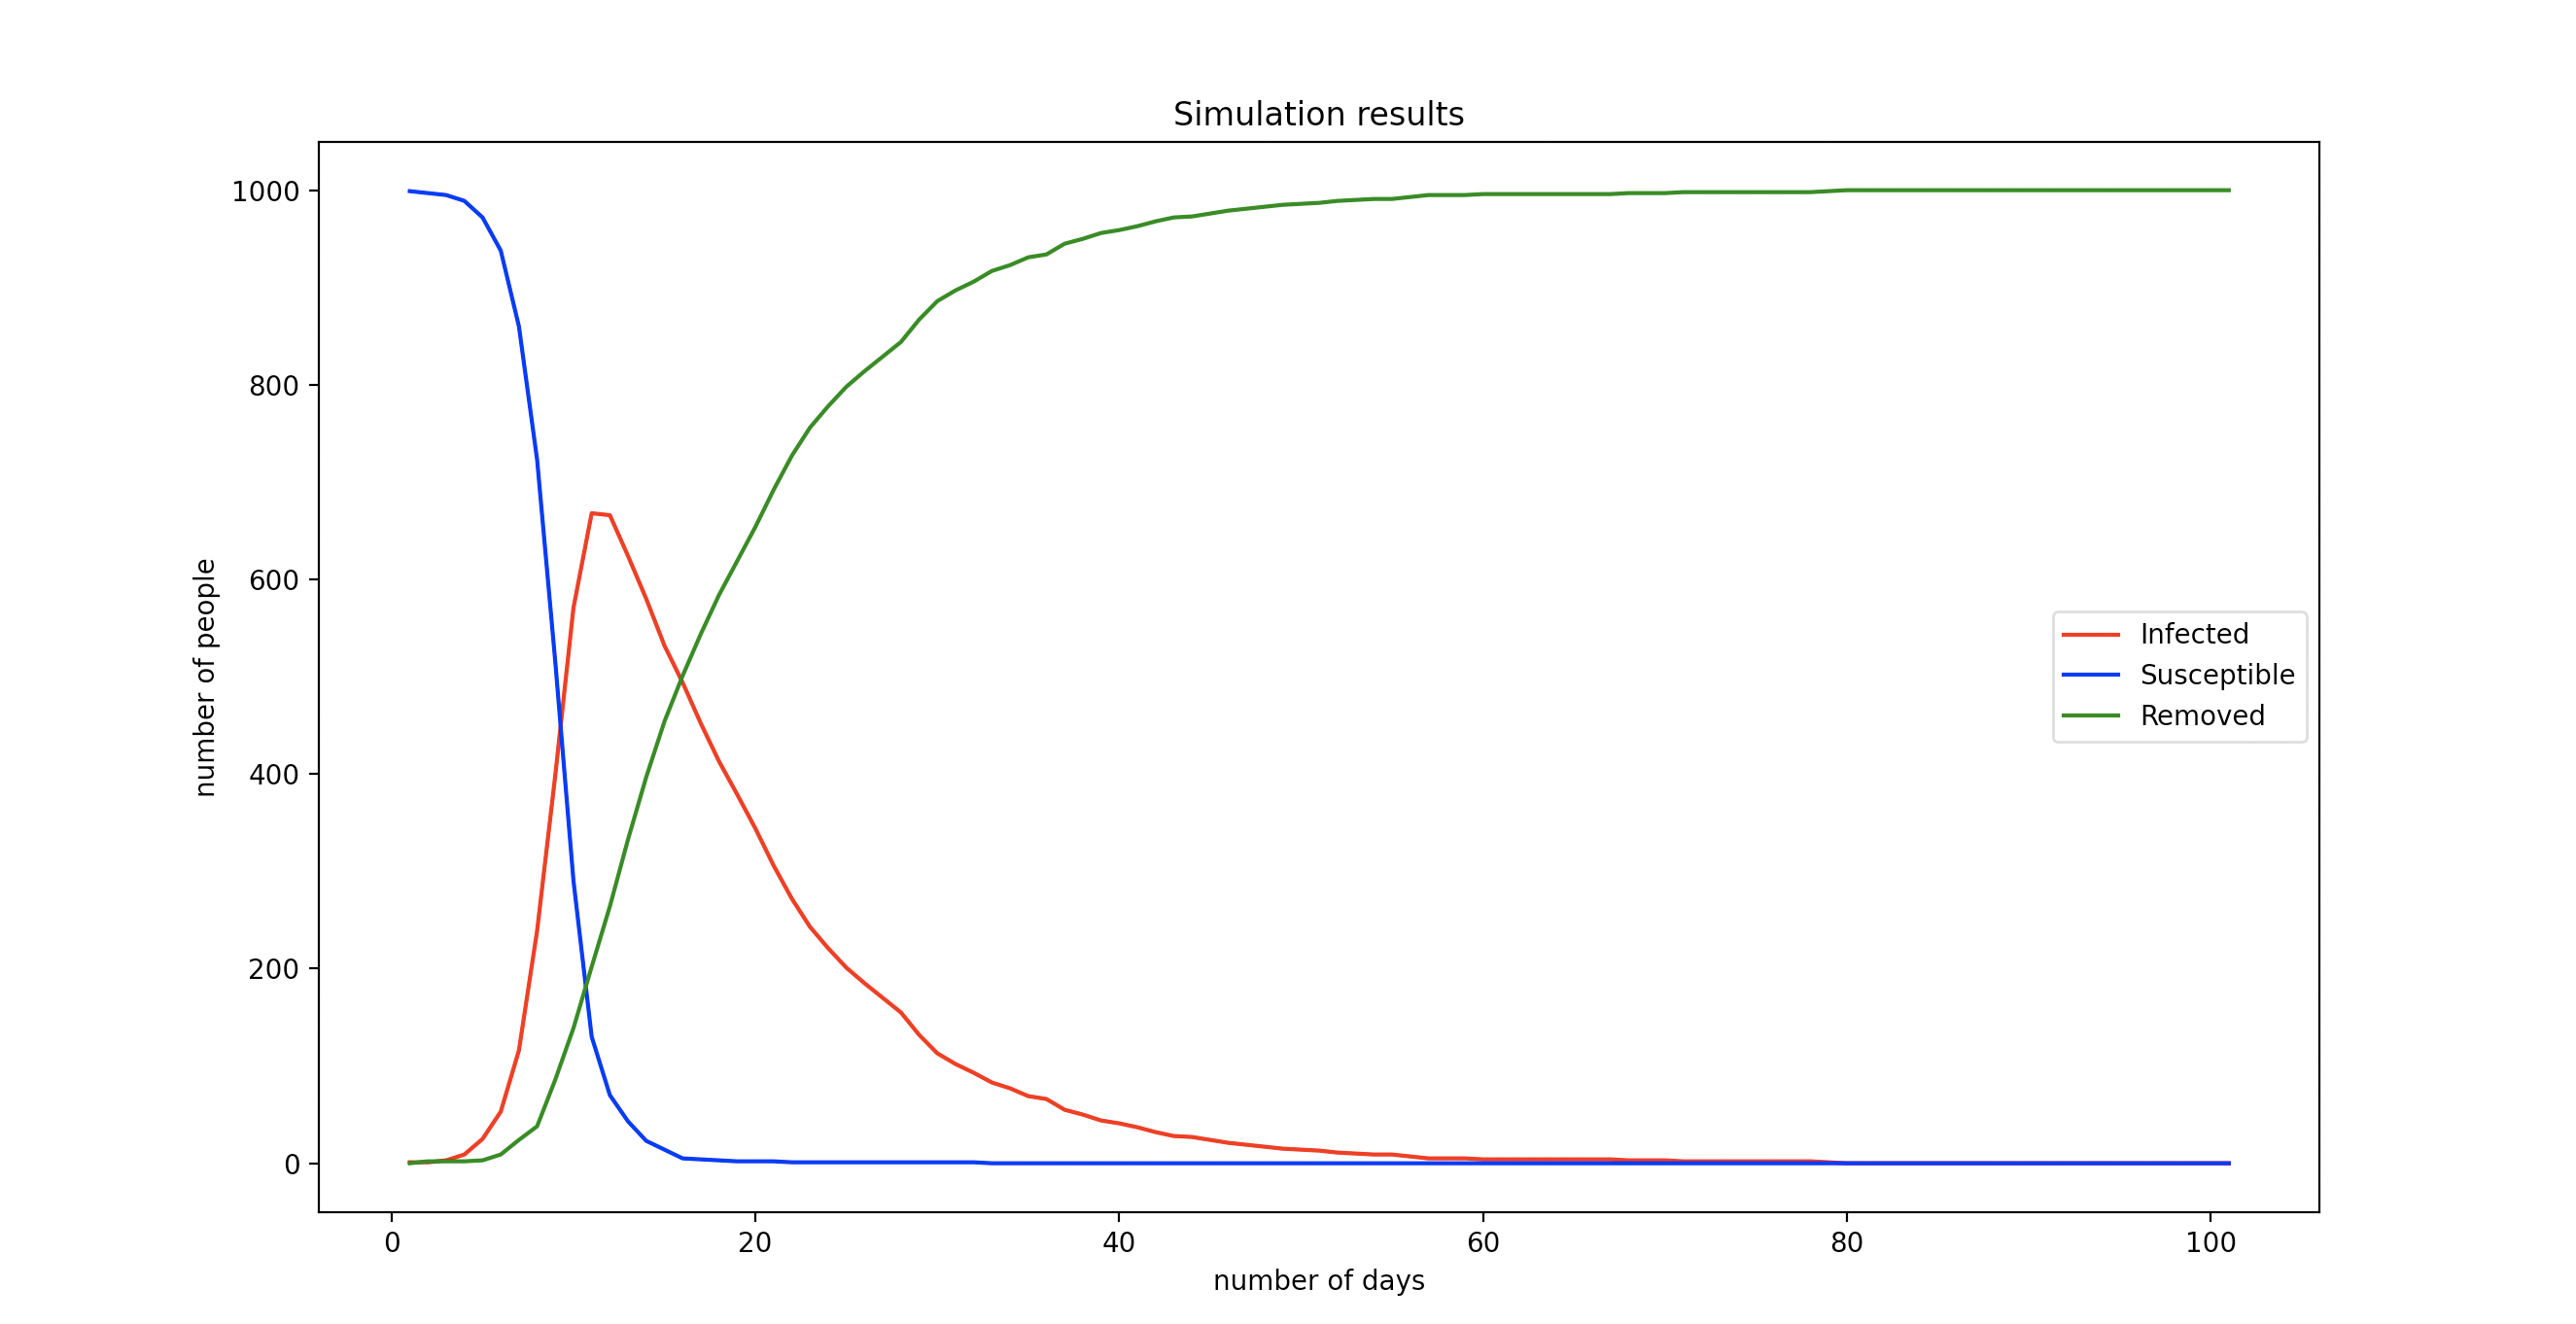


Simulation2:
1. Number of people one infected patient can infect in one day: `b = 5`
2. Fraction of people that could recover everyday: `k = 0.01`

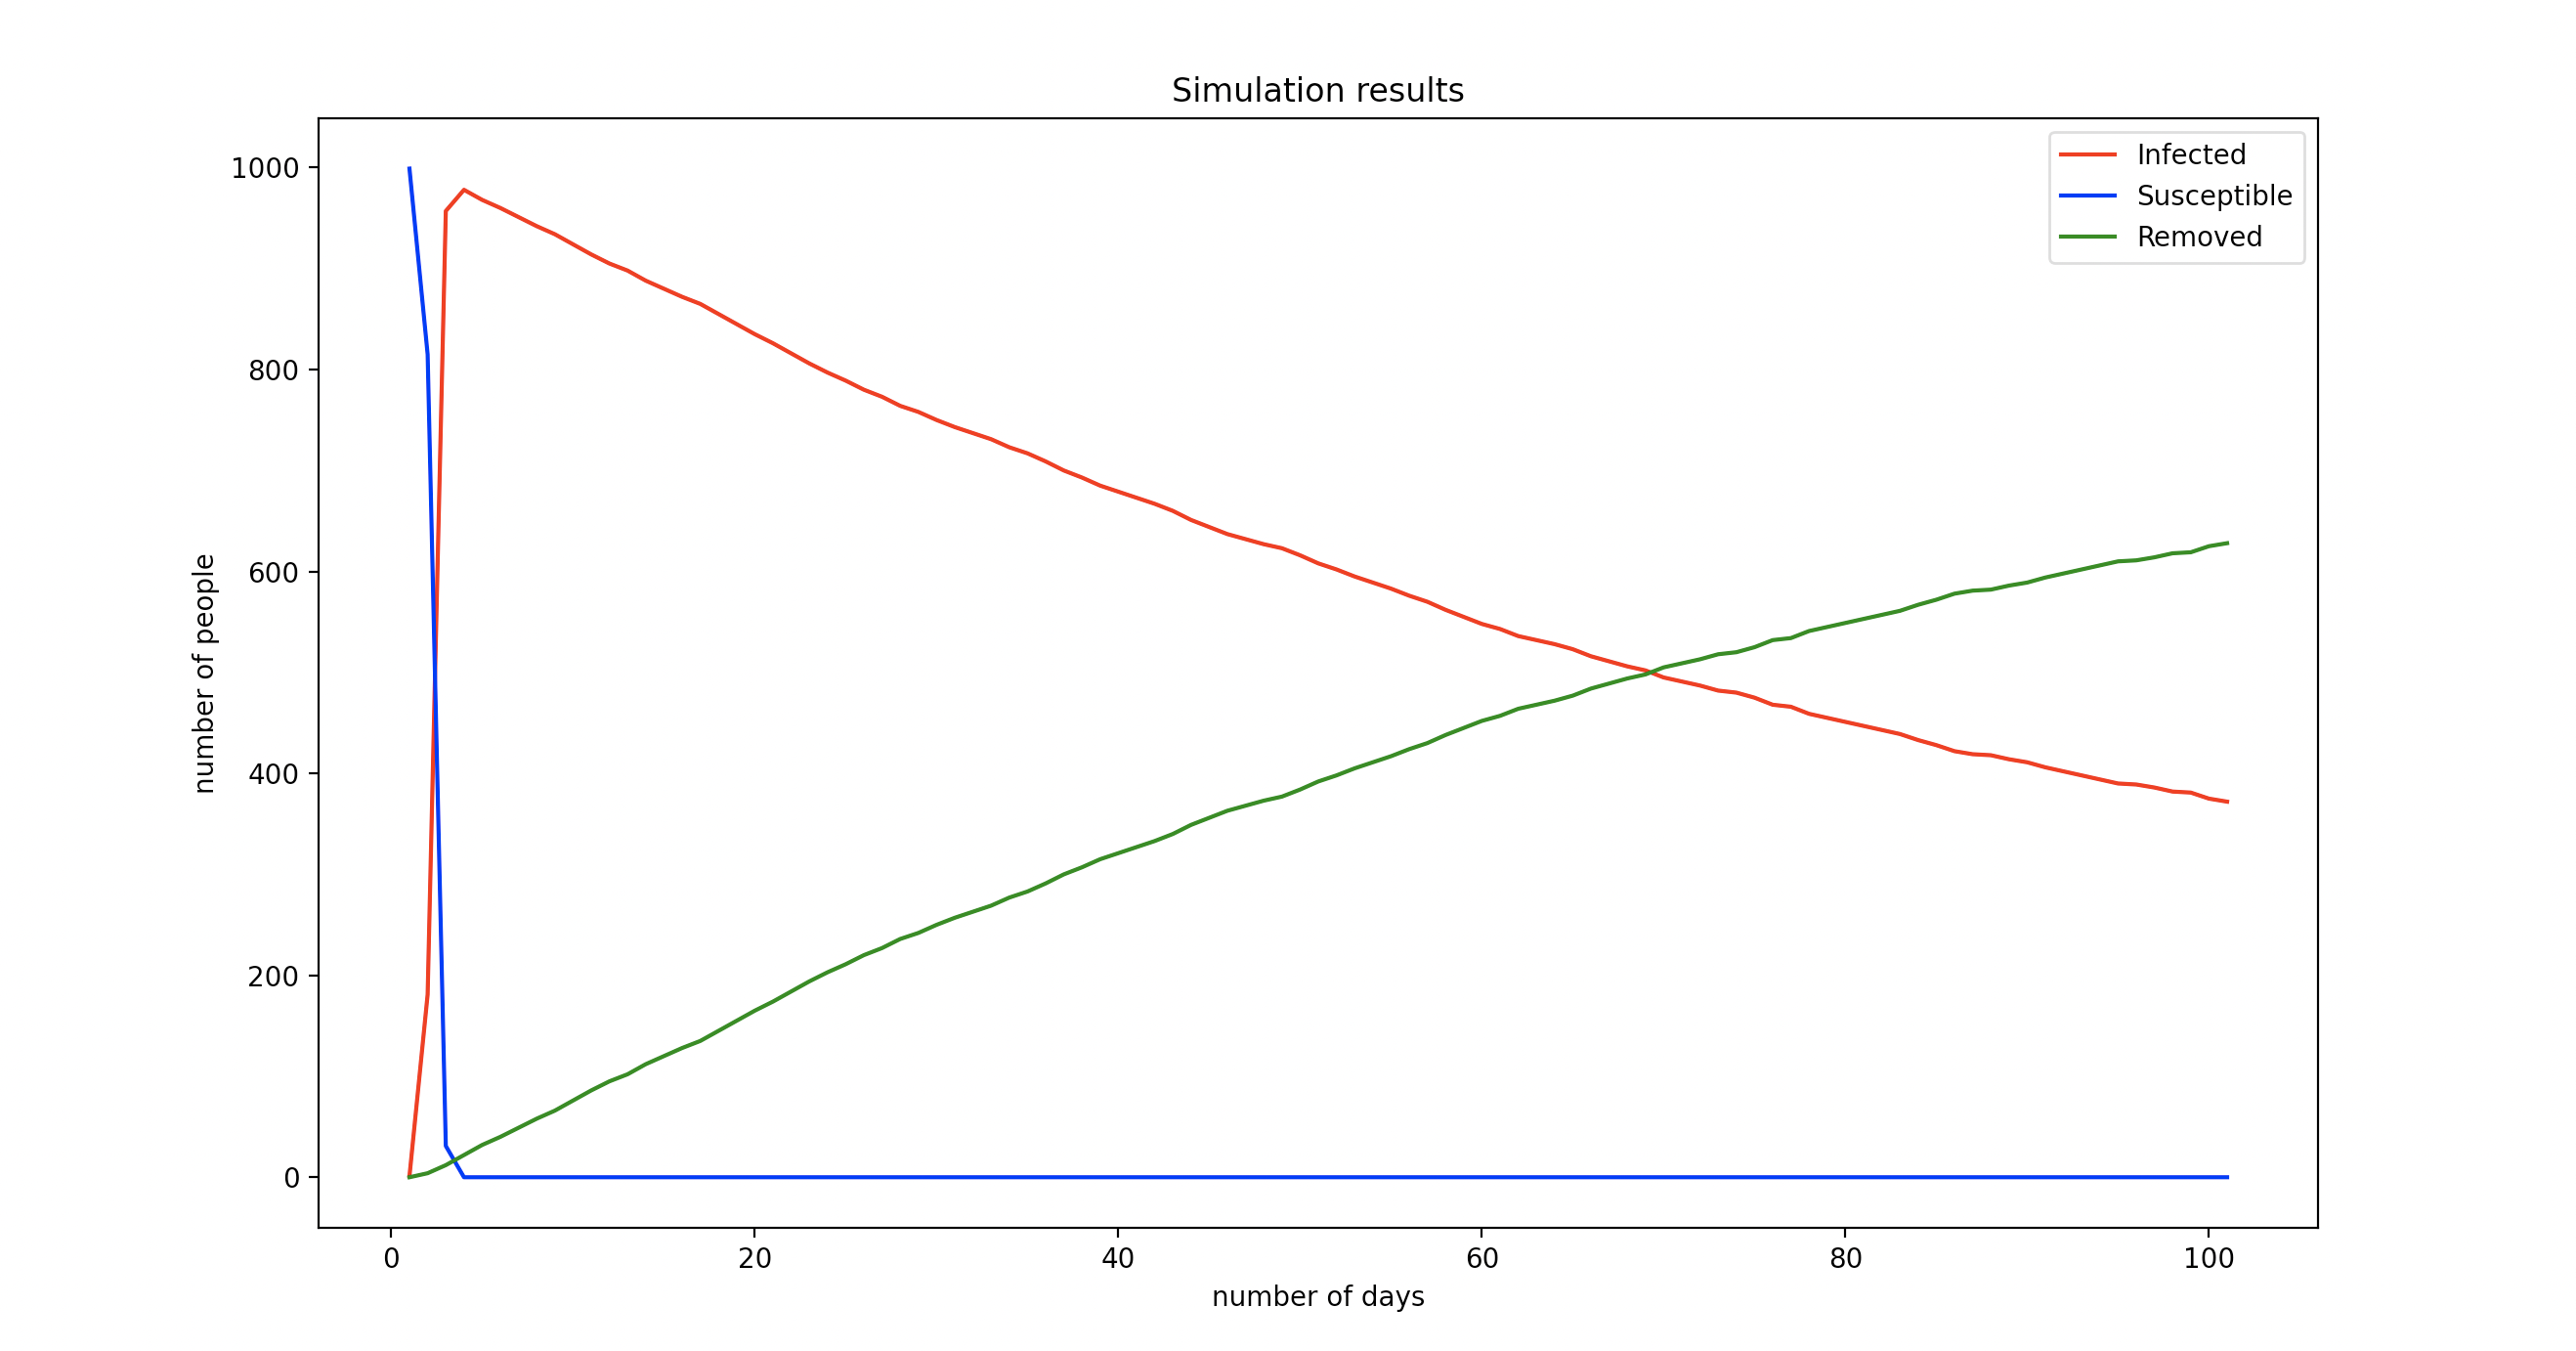

Simulation3:
1. Number of people one infected patient can infect in one day: `b = 1`
2. Fraction of people that could recover everyday: `k = 0.5`

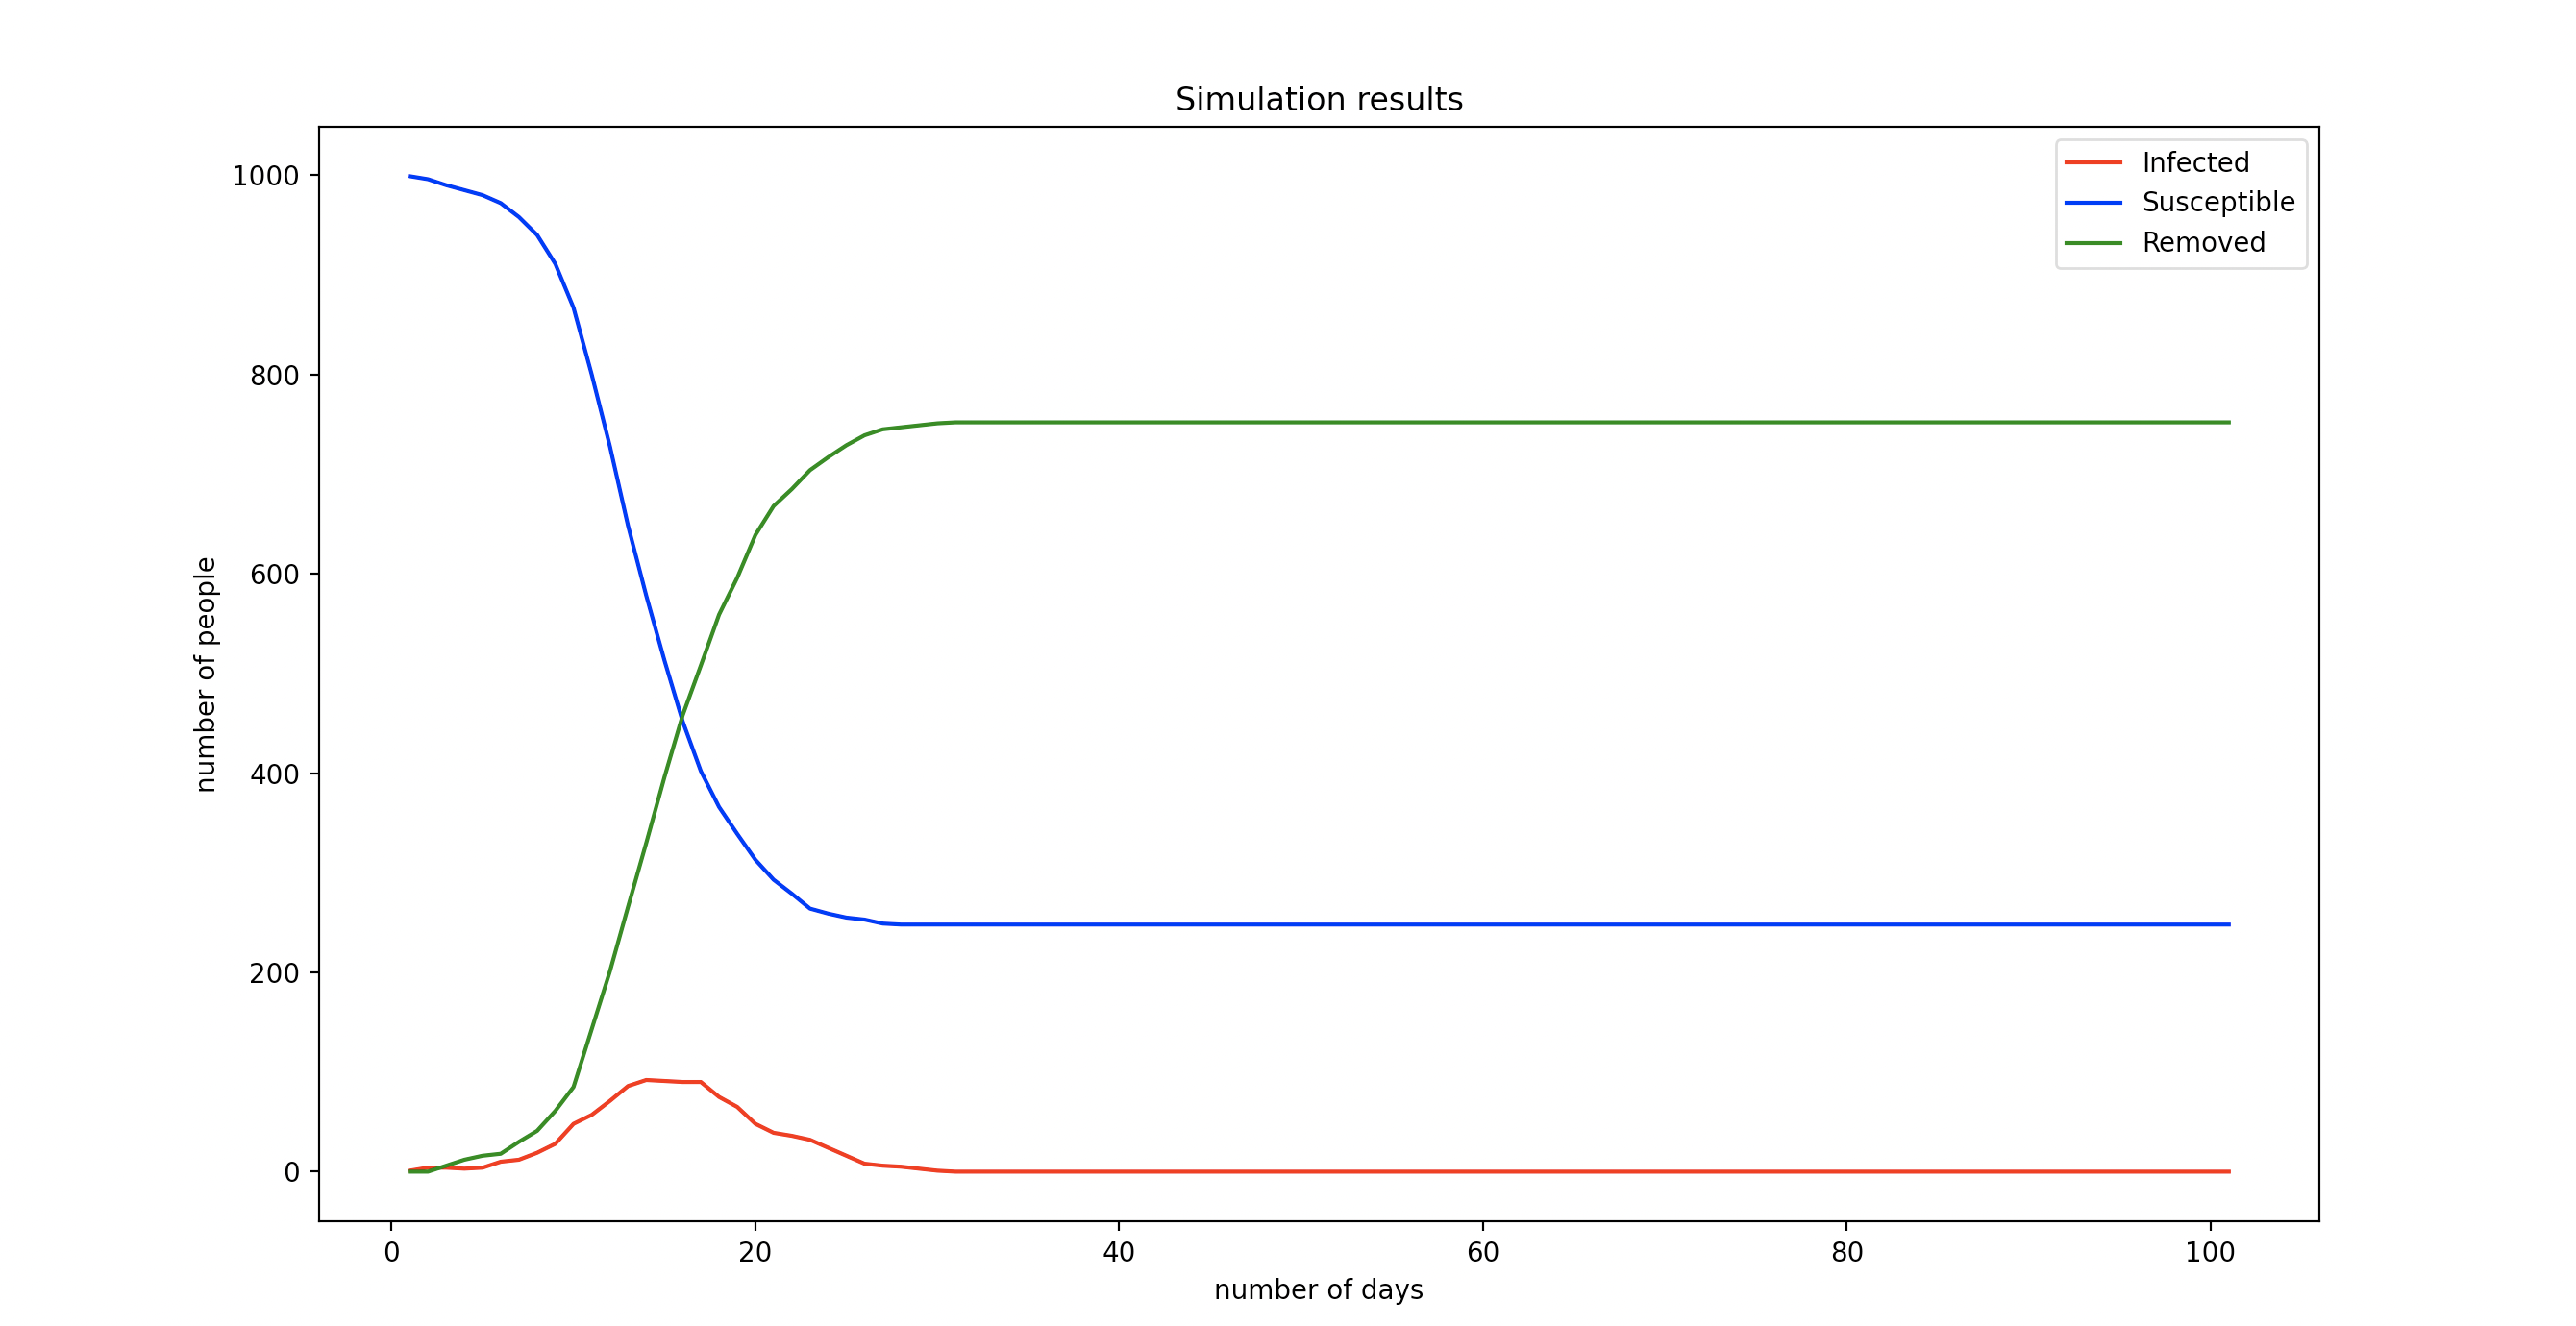

### Observations from the simulations: 
1. We see that in all simulations, the number of infected people usually peak within the first 20 days, and would always eventually decreases back to 0. This is because at the start of the simulation, the disease spreads in the population very quickly, infecting a large number of people. However, eventually more and more people would be removed. Since those removed cannot be infected again, the number of infected would reach 0 if we run the simulation long enough. 
2. The number of susceptible people will always decrease due to the fact that infected people are no longer susceptible. However, the number of susceptible people may not eventually reach `0`, depending on `b` and `k`. In the 3rd simulation we saw that the speed of spreading is not fast (one person could only infect one other person), while the removing rate is very high (50%), resulting in a part of the population never getting infected before the disease dies out, therefore the number of susceptible people never reached `0`.
3. The number of removed people will always increase (with aa small lag after the susceptible numbers) due to the fact that a certain number of people are being removed everyday. We also oobserve that the remove numbers may not reach `N` because a part of the population may never get infected, therefore could never be removed. 

### Phase Diagram

One question we might ask is how the outcome changes as we change parameters `b` and `k`. We can try to visualize this by counting the number of infected people by the end of day `20` while running our simulation on a range of `b` and `k`, and visualize the results in a phase diagram.  

(Note: Code for running the simulation on a range of `k` and `b`, and visualizing the results are all included in the `script.py` file)

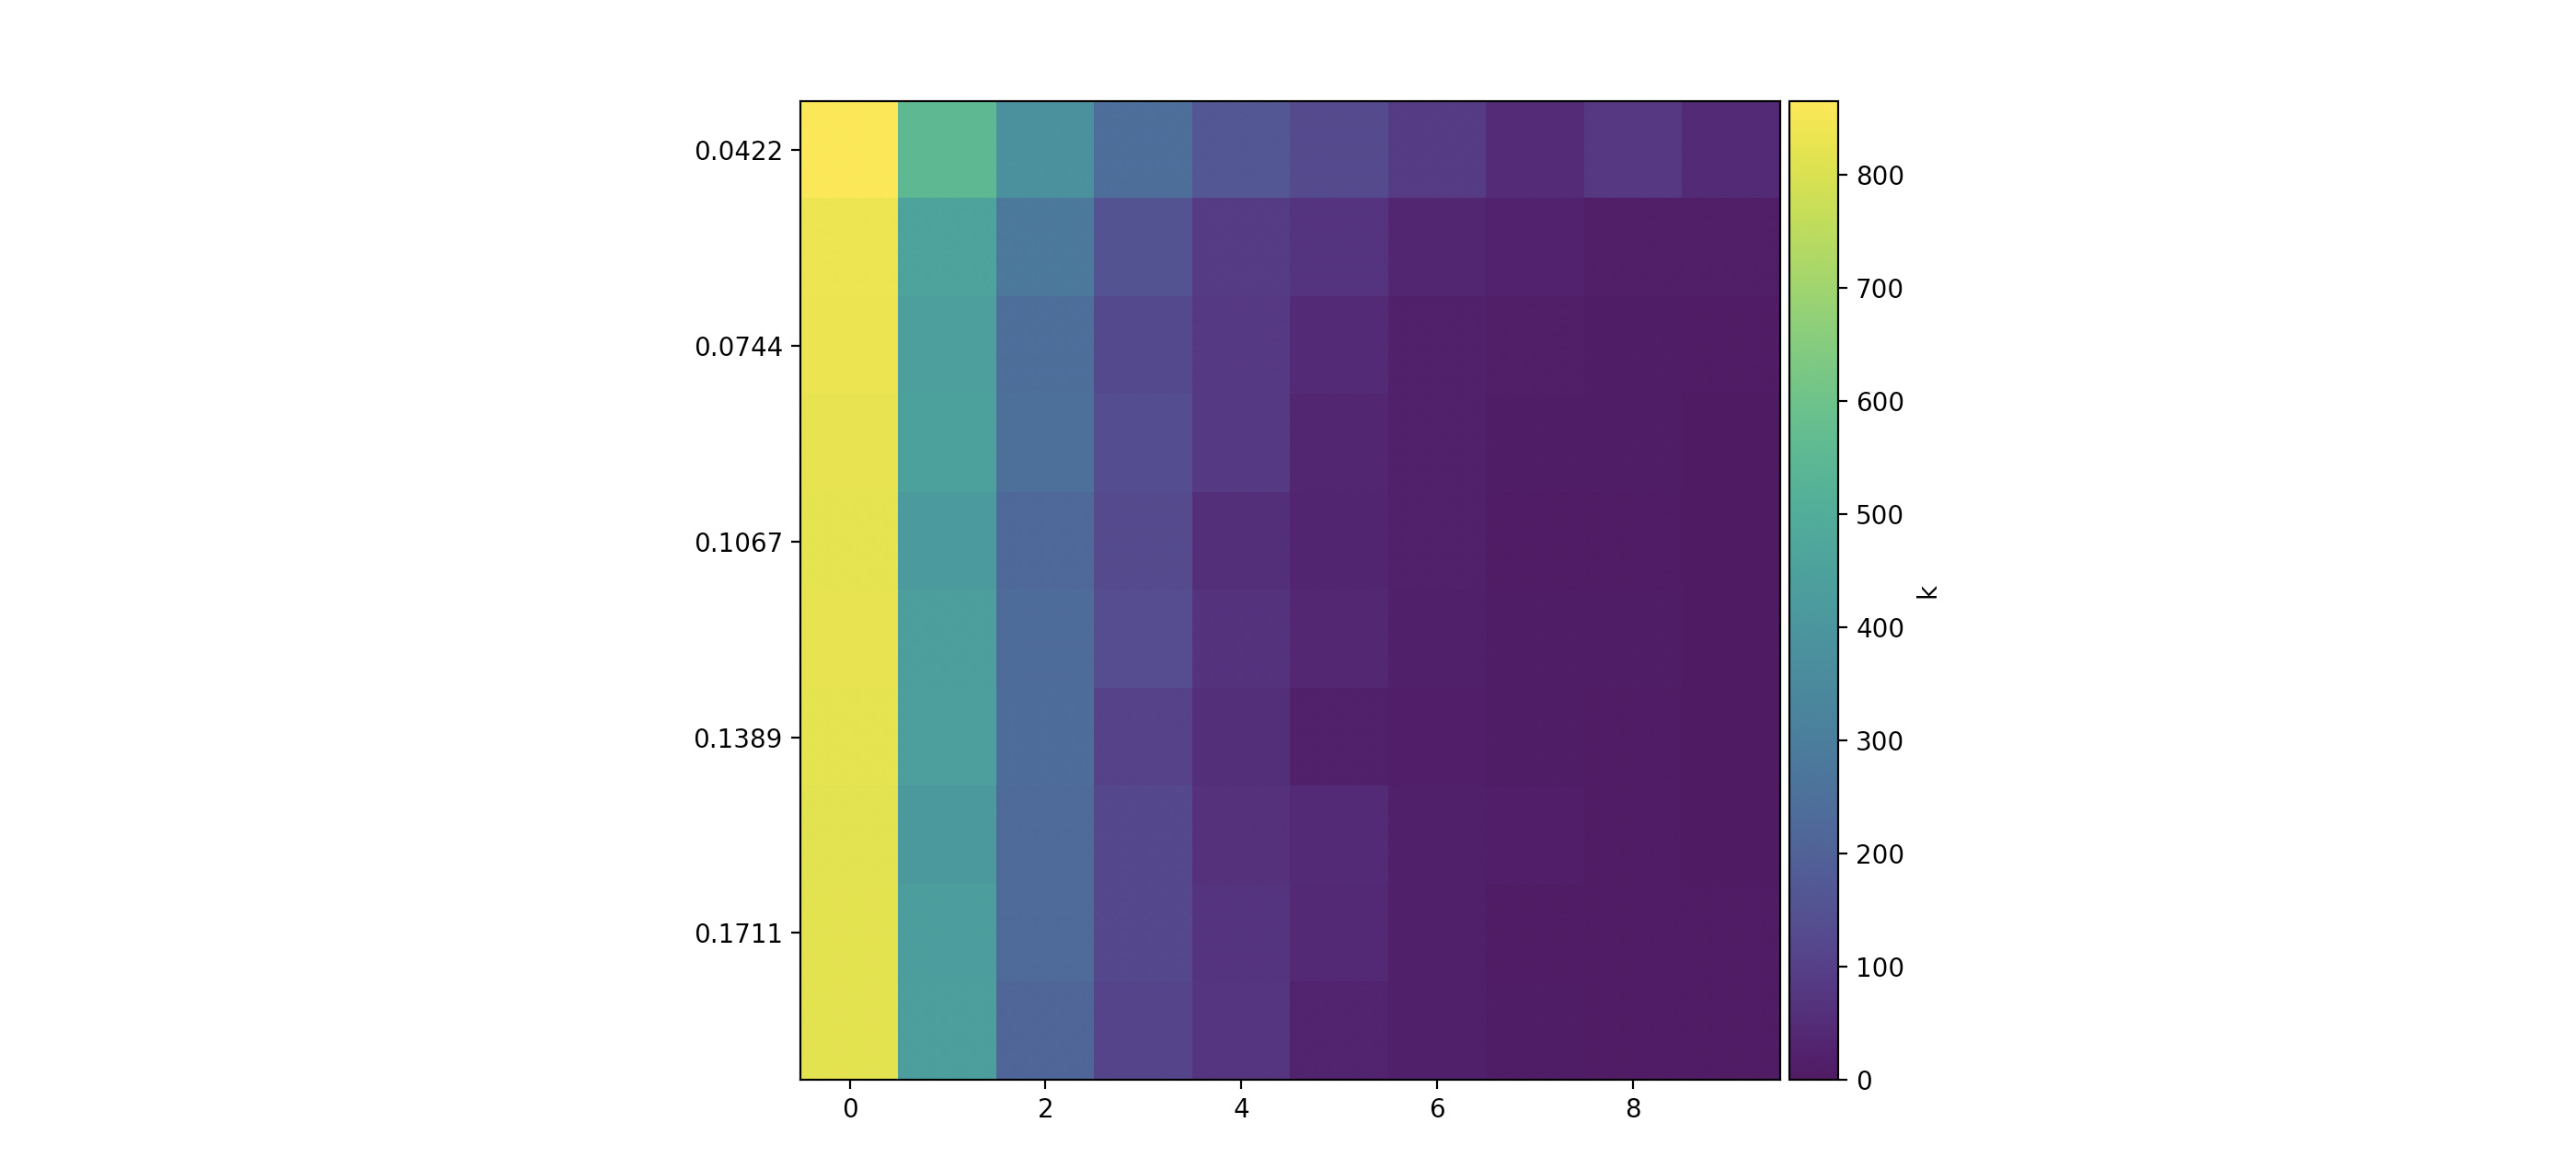

Note:
We implemented one of the more interesting examples in a phase diagram. In this case, here are the simulation prarameters:
1. Population size: `N = 1000`
2. Number of people one infected patient can infect in one day: `b = [1,2,...,10]`
3. Fraction of people that could recover everyday: `k` are 10 evenly spaced values between `0.01 and 0.3`
4. Number of infected people at the start of the simulation: `z = 1`
5. Number of days to run the simulation: `T = 20`

### Observations from the phase diagram: 

In this particular example, we see that after 20 days, the number of infected people is higher when both `k` and `b` are small. This is because when `k` and `b` are small, the peak would appear later, while when `k` and `b` are larger, the peak would already have passed at Day 20, and most infected people would already be cured, leaving infected numbers close to 0. This fits the simulations that we ran earlier. 

### Variation 1: The effect of quarantines and isolation

__Variation Idea:__


We wish to take into consideration the effect of "quarantining" on the disease-spread model. Naturally, if an infected person is isolated or in quarantine, this person would be less likely to interact with others, therefore cannot infect others. 

__Implementation:__


To see the effects of quarantining and isolation, we need to introduce 2 new parameters: 
1. Parameter `p`: this controls the probability of a person interacting with others after being infected. More specifically, this means that after being infected, a person will interact with others with probability p. Depending on reasons like policies, `p` would be different in different countries and times. 
2. Parameter "interactable": this parameter is introduced to the `Person` class. This parameter will default to `False` and then set to `True` with probability p. In our simulations, a person is only infected if the infector is interactable, and the infectee is also interactable. If either of them is not interactable, this means that interactions won't happen, therefore infection won't happen. 

To implement these parameters in code, I made two new files in the `sir` package: `Person2` and `discrete2`. In `Person2`, the new parameter `interactable` is taken into consideration, and in `discrete2`, simulation code is modified accordingly. 

__Simulation Result__: 

Simulation4:
1. Number of people one infected patient can infect in one day: `b = 1`
2. Fraction of people that could recover everyday: `k = 0.1`
3. Probability that a person would still go interact with others after being infected: `p = 0.2`

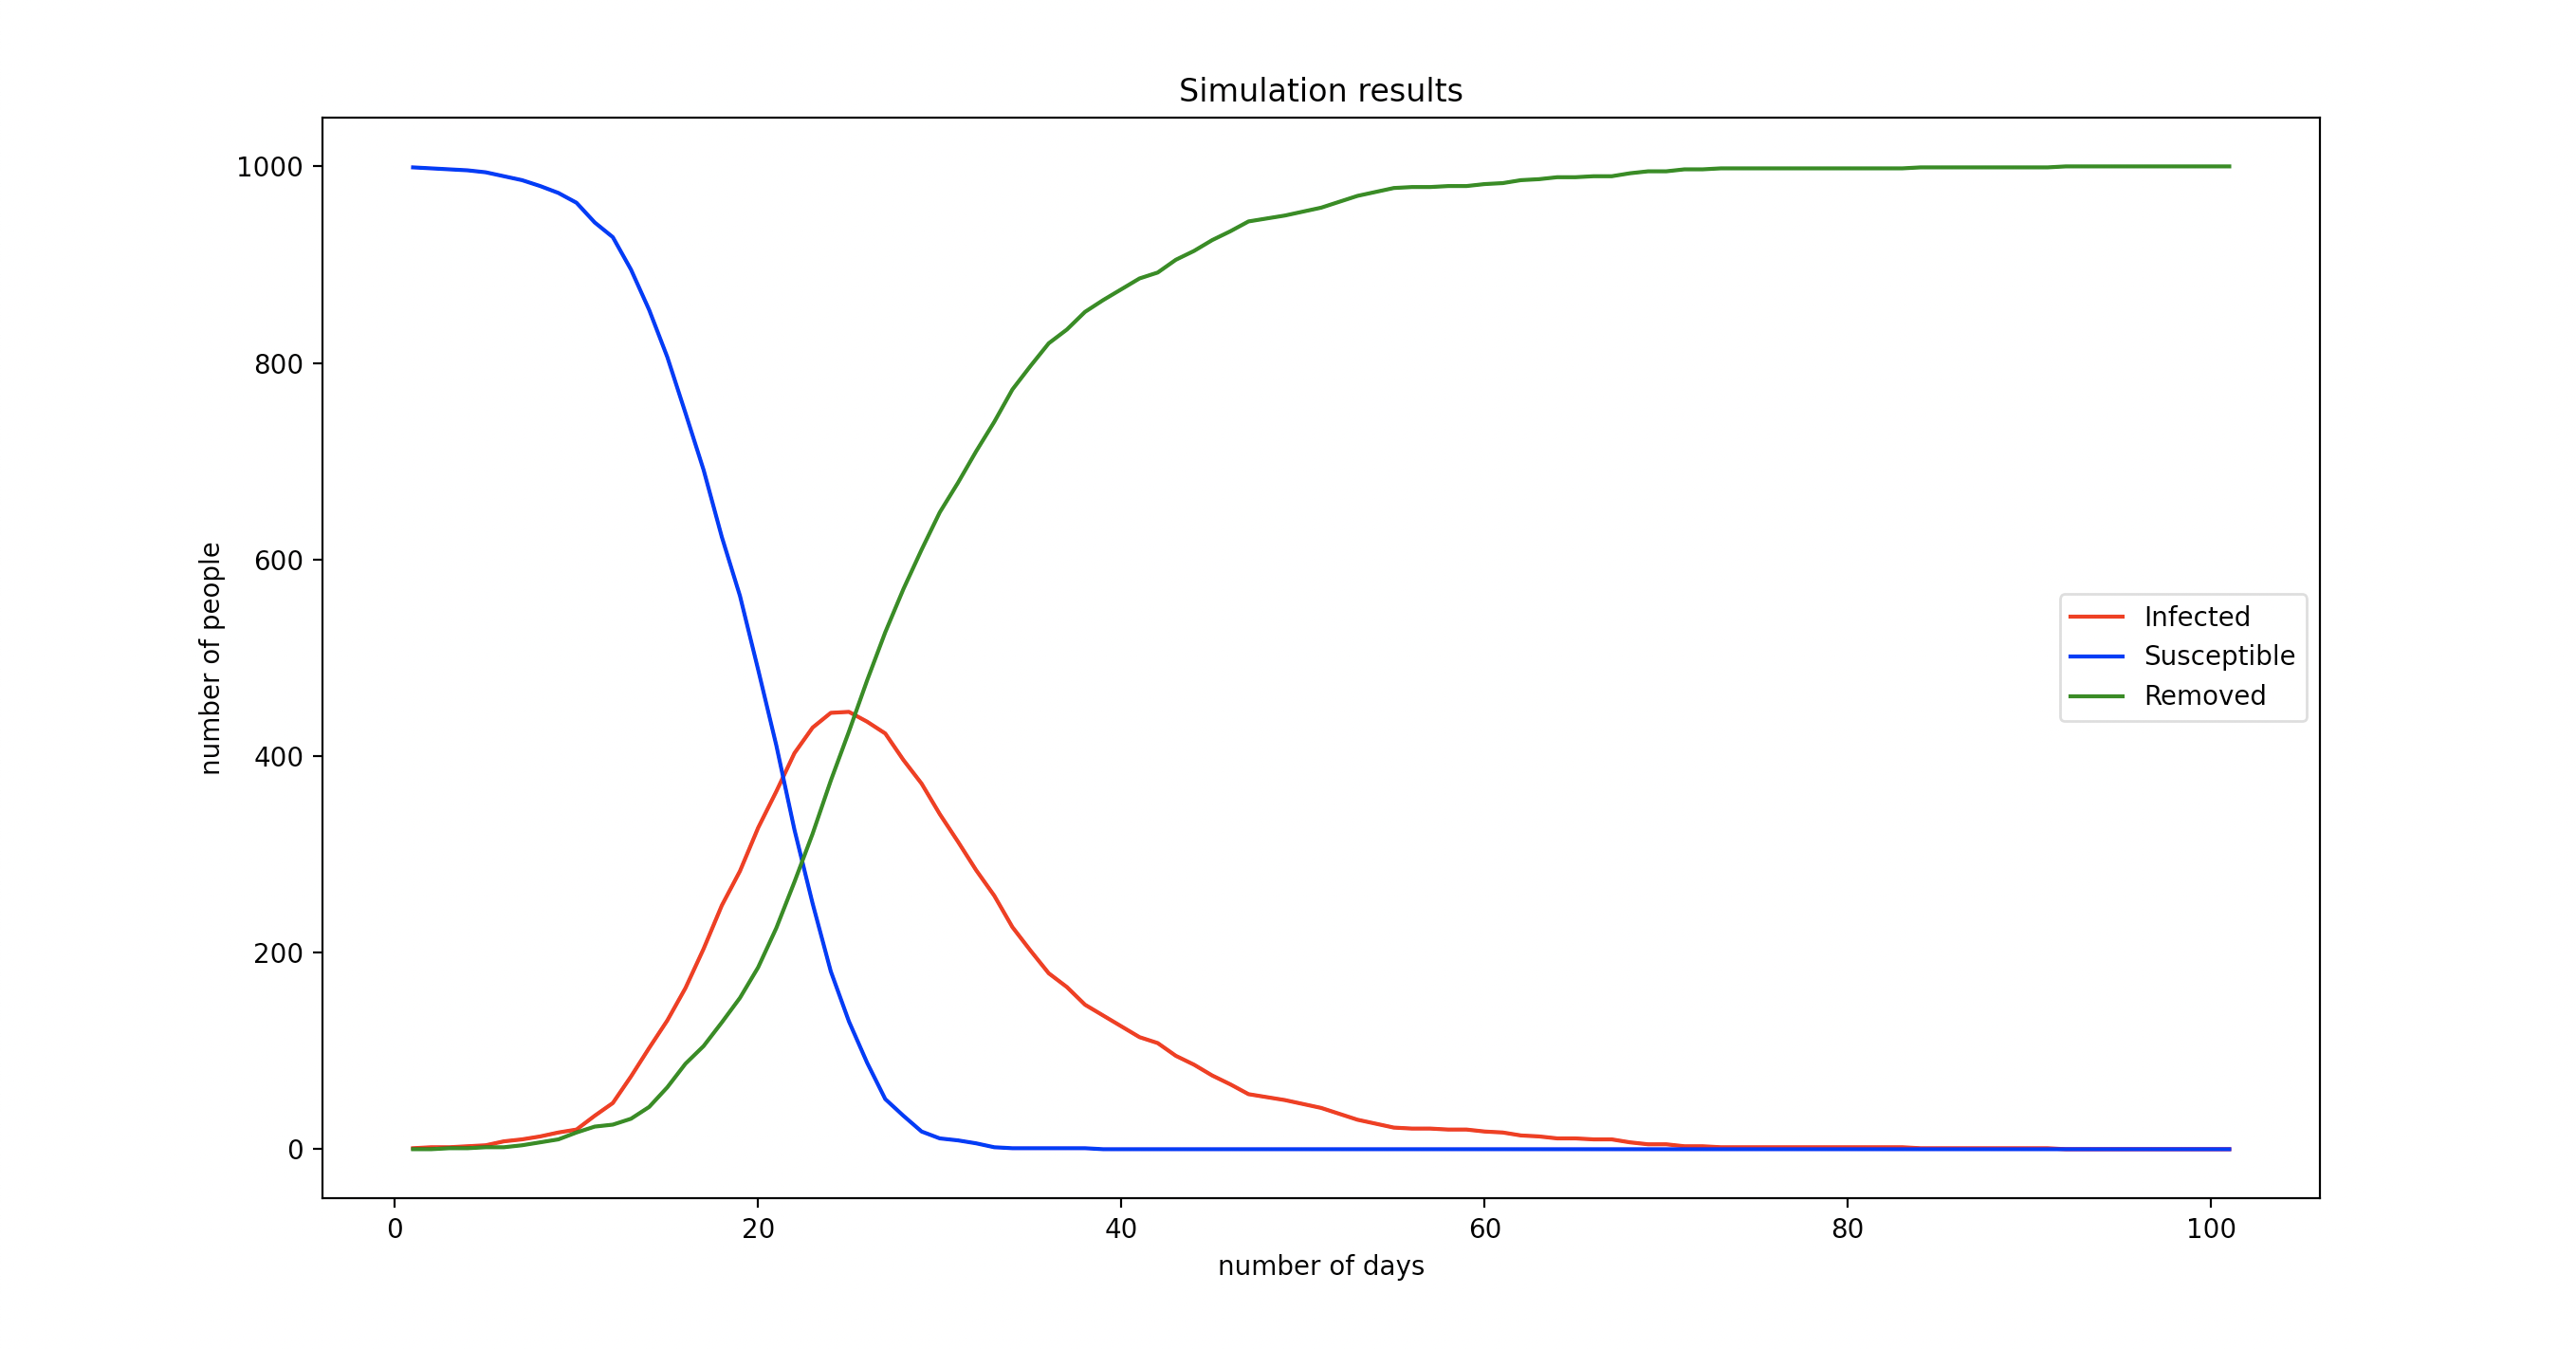

__Observations__: 
    
We could see that compare with simulation1, the parameters `b` and `k` remained the same, but adding a parameter `p = 0.2` resulted in the curve increasing more slowly, and the peak of the number of infected people to be less than the case without the parameter `p`. 

This means that if 80% of the population do follow isolation and quaratining rules and stop interacting with others after being infected, the infection curve would indeed grow more slowly, and there will be less people infected overall. 

### Variation 2: The effect of masks

__Variation Idea:__


We also want to see that how will masks stopped the spread of the disease during the covid-19. We can have a very smaller model like the previous case since the use of masks is another way that we consider as infected people cannot infect others. We would change the `p` as 0.05 since we think mask can protect us with 95% certainty.

__Simulation Result__:

Simulation5:
1. Number of people one infected patient can infect in one day: `b = 5`
2. Fraction of people that could recover everyday: `k = 0.1`
3. Probability that a person would still go interact with others after wearing a mask: `p = 0.05`

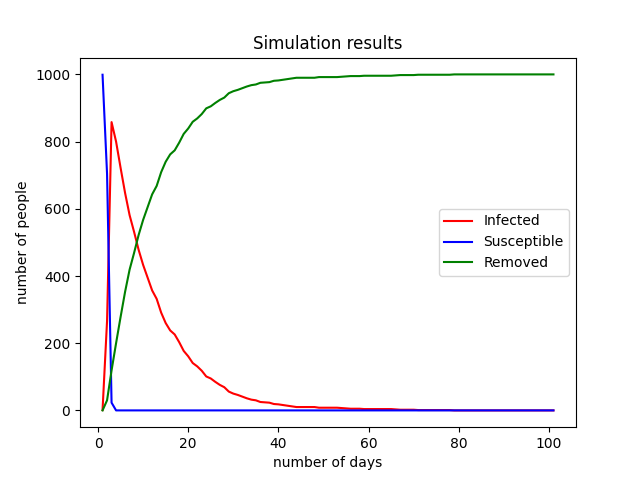

__Observations__:
    We can see in the simulation, the `b` is higher but since now the new parameter `p` is relatively small, the total infected number converage to zero very soonm while the peak number is only control by `b`. So we can now understand why CDC force everyone to wear the mask in the public and this indeed help protect the virus.

In the agent-base case, we can also discuss the use of masks to slow disease spread, which is a very controversial topic that is argued during the covid-19 spread. We want to see whether the use of masks can make a big difference to slow down the spread speed of the disease.

To study the use of masks, we would like to introduce a new parameter into the model. The masks can reduce the possibility that both `susceptible` people to be infected and the chance that `infectious` people to spread the disease. We may do futher study and try different numbers for that fraction depending on the different types of masks.

According to the CDC and recent study about N-95 masks, we may anticipate that the use of masks can reduce the spread significantly.

## 3. ODE method

### Simulation Setup
We first setup the time dependent variables `s,i,r`, the fraction of each population in the population (`s+i+r=1` at all times). Next we set the following system of differential equations:
1. `ds/dt=-b*s(t)*i(t)` <br>
2. `dr/dt=k*i(t)` <br>
3. `di/dt=b*s(t)*i(t)-k*i(t)`<br>

where `b` is the number of interactions each day that could spread the disease (per individual) and `k` is the fraction of infectious popution which recovers each day. <br>
we define the `ODE` function solve the stated differential equations numerically (placed in `sir` directory) and we need initial values for `s,i,r,b,k` as well as `day` (days under observation).


### Simulation 1
The initial values follow as: <br>
`s=0.92` <br>
`i=0.003`<br>
`r=1-s-i`<br>
`b=1`   <br>
`k=0.1` <br>
`day=100`

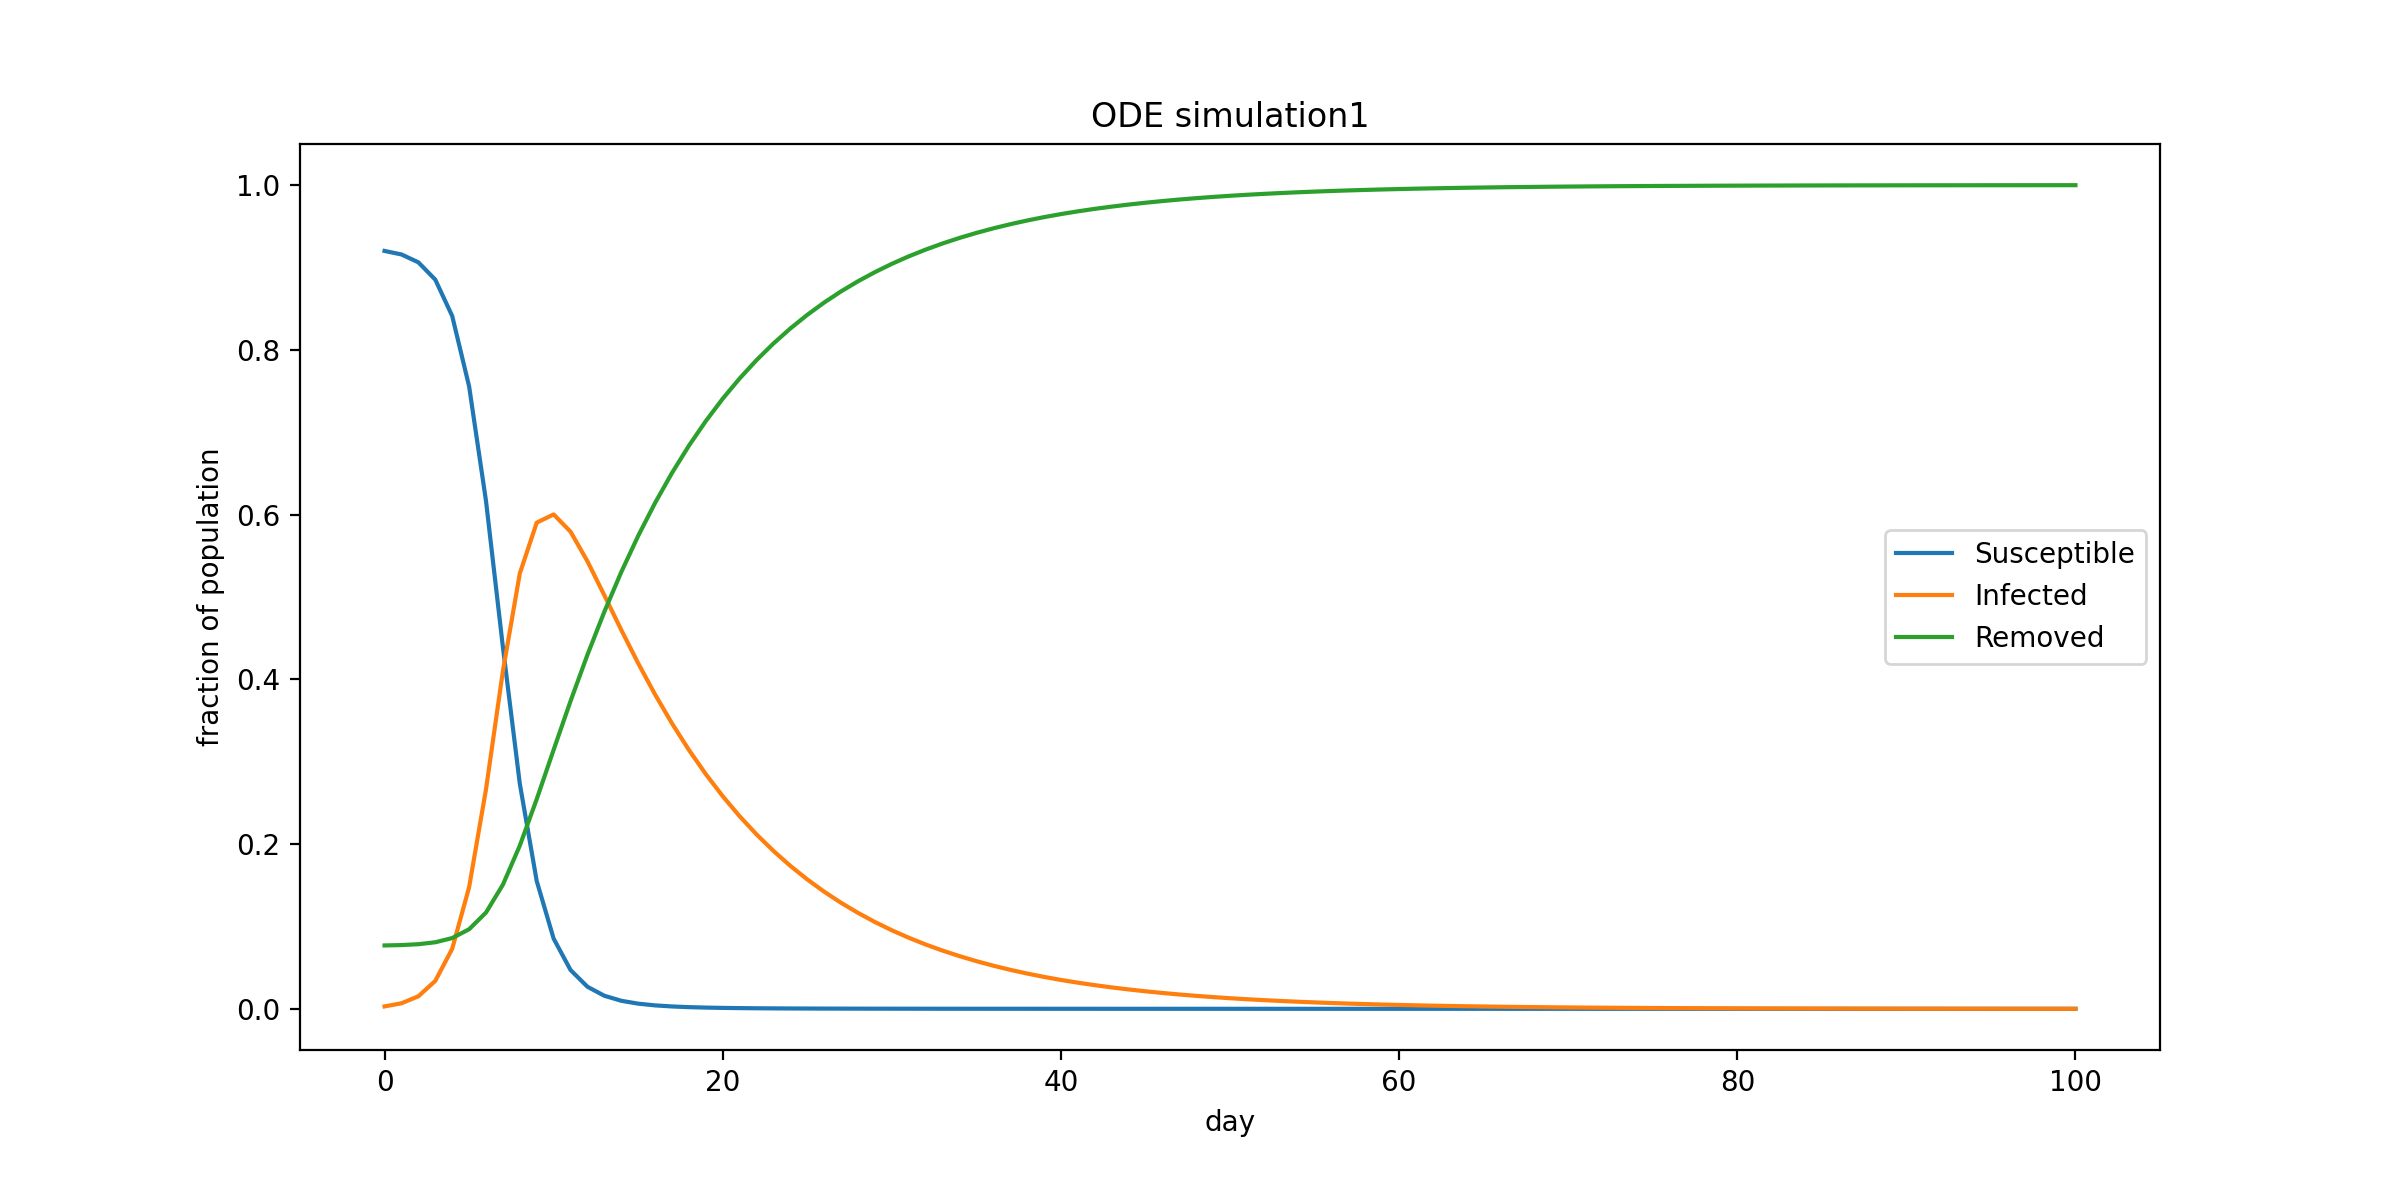

### Simulation 2
The initial values follow as: <br>
`s=0.92` <br>
`i=0.003`<br>
`r=1-s-i`<br>
`b=0.5`   <br>
`k=0.2` <br>
`day=100`

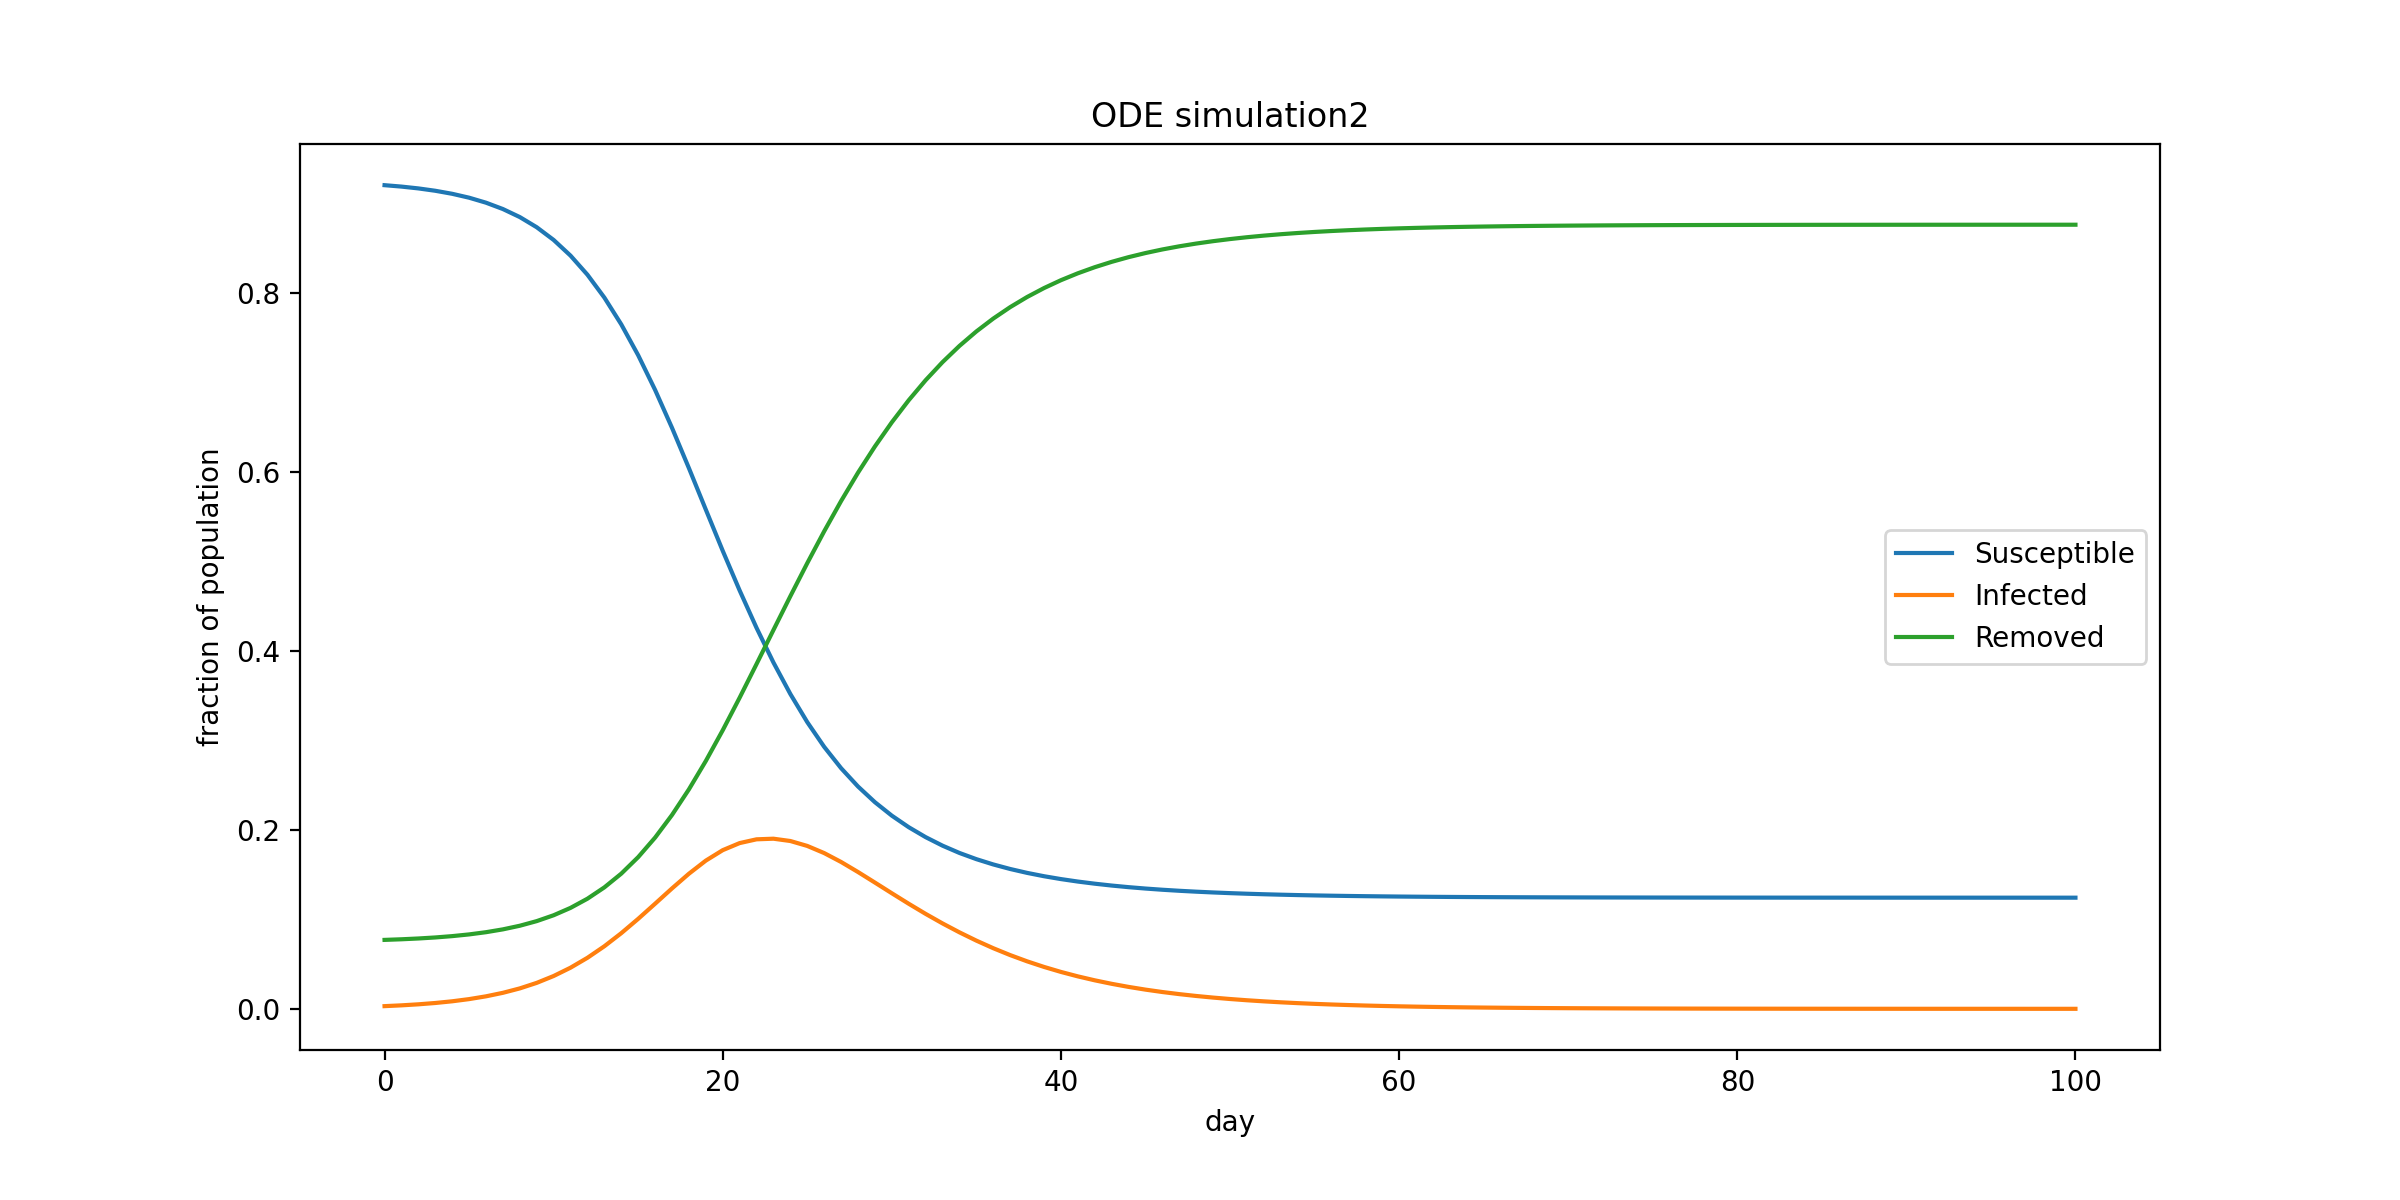

### Simulation 3
The initial values follow as: <br>
`s=0.92` <br>
`i=0.003`<br>
`r=1-s-i`<br>
`b=0.2`   <br>
`k=0.08` <br>
`day=100`

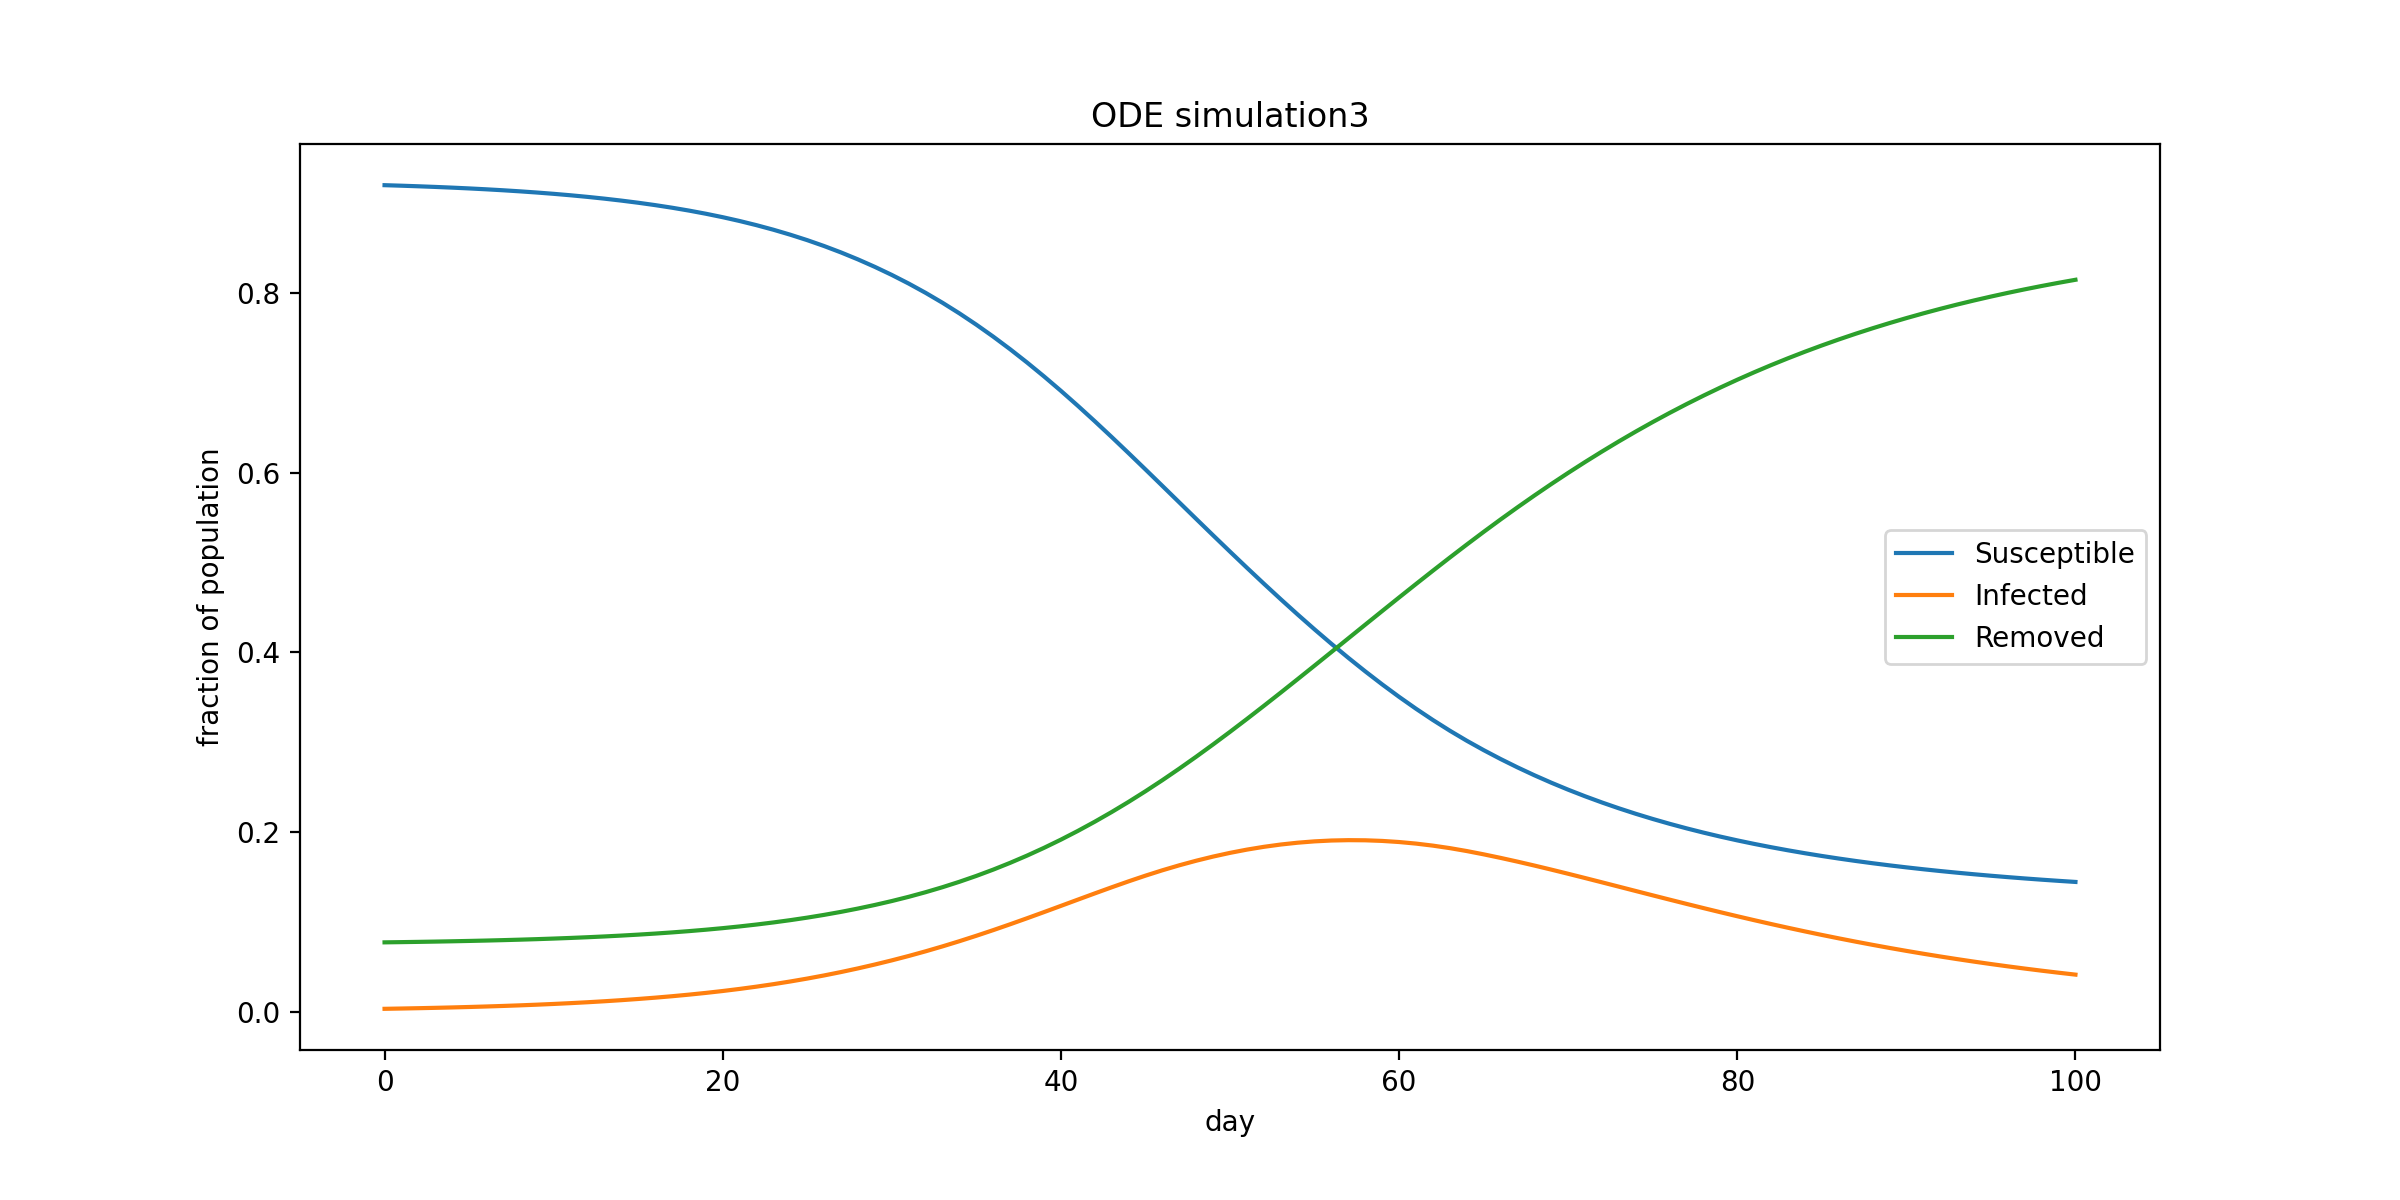

### Simulation 4
The initial values follow as: <br>
`s=0.92` <br>
`i=0.003`<br>
`r=1-s-i`<br>
`b=0.2`   <br>
`k=0.5` <br>
`day=100`

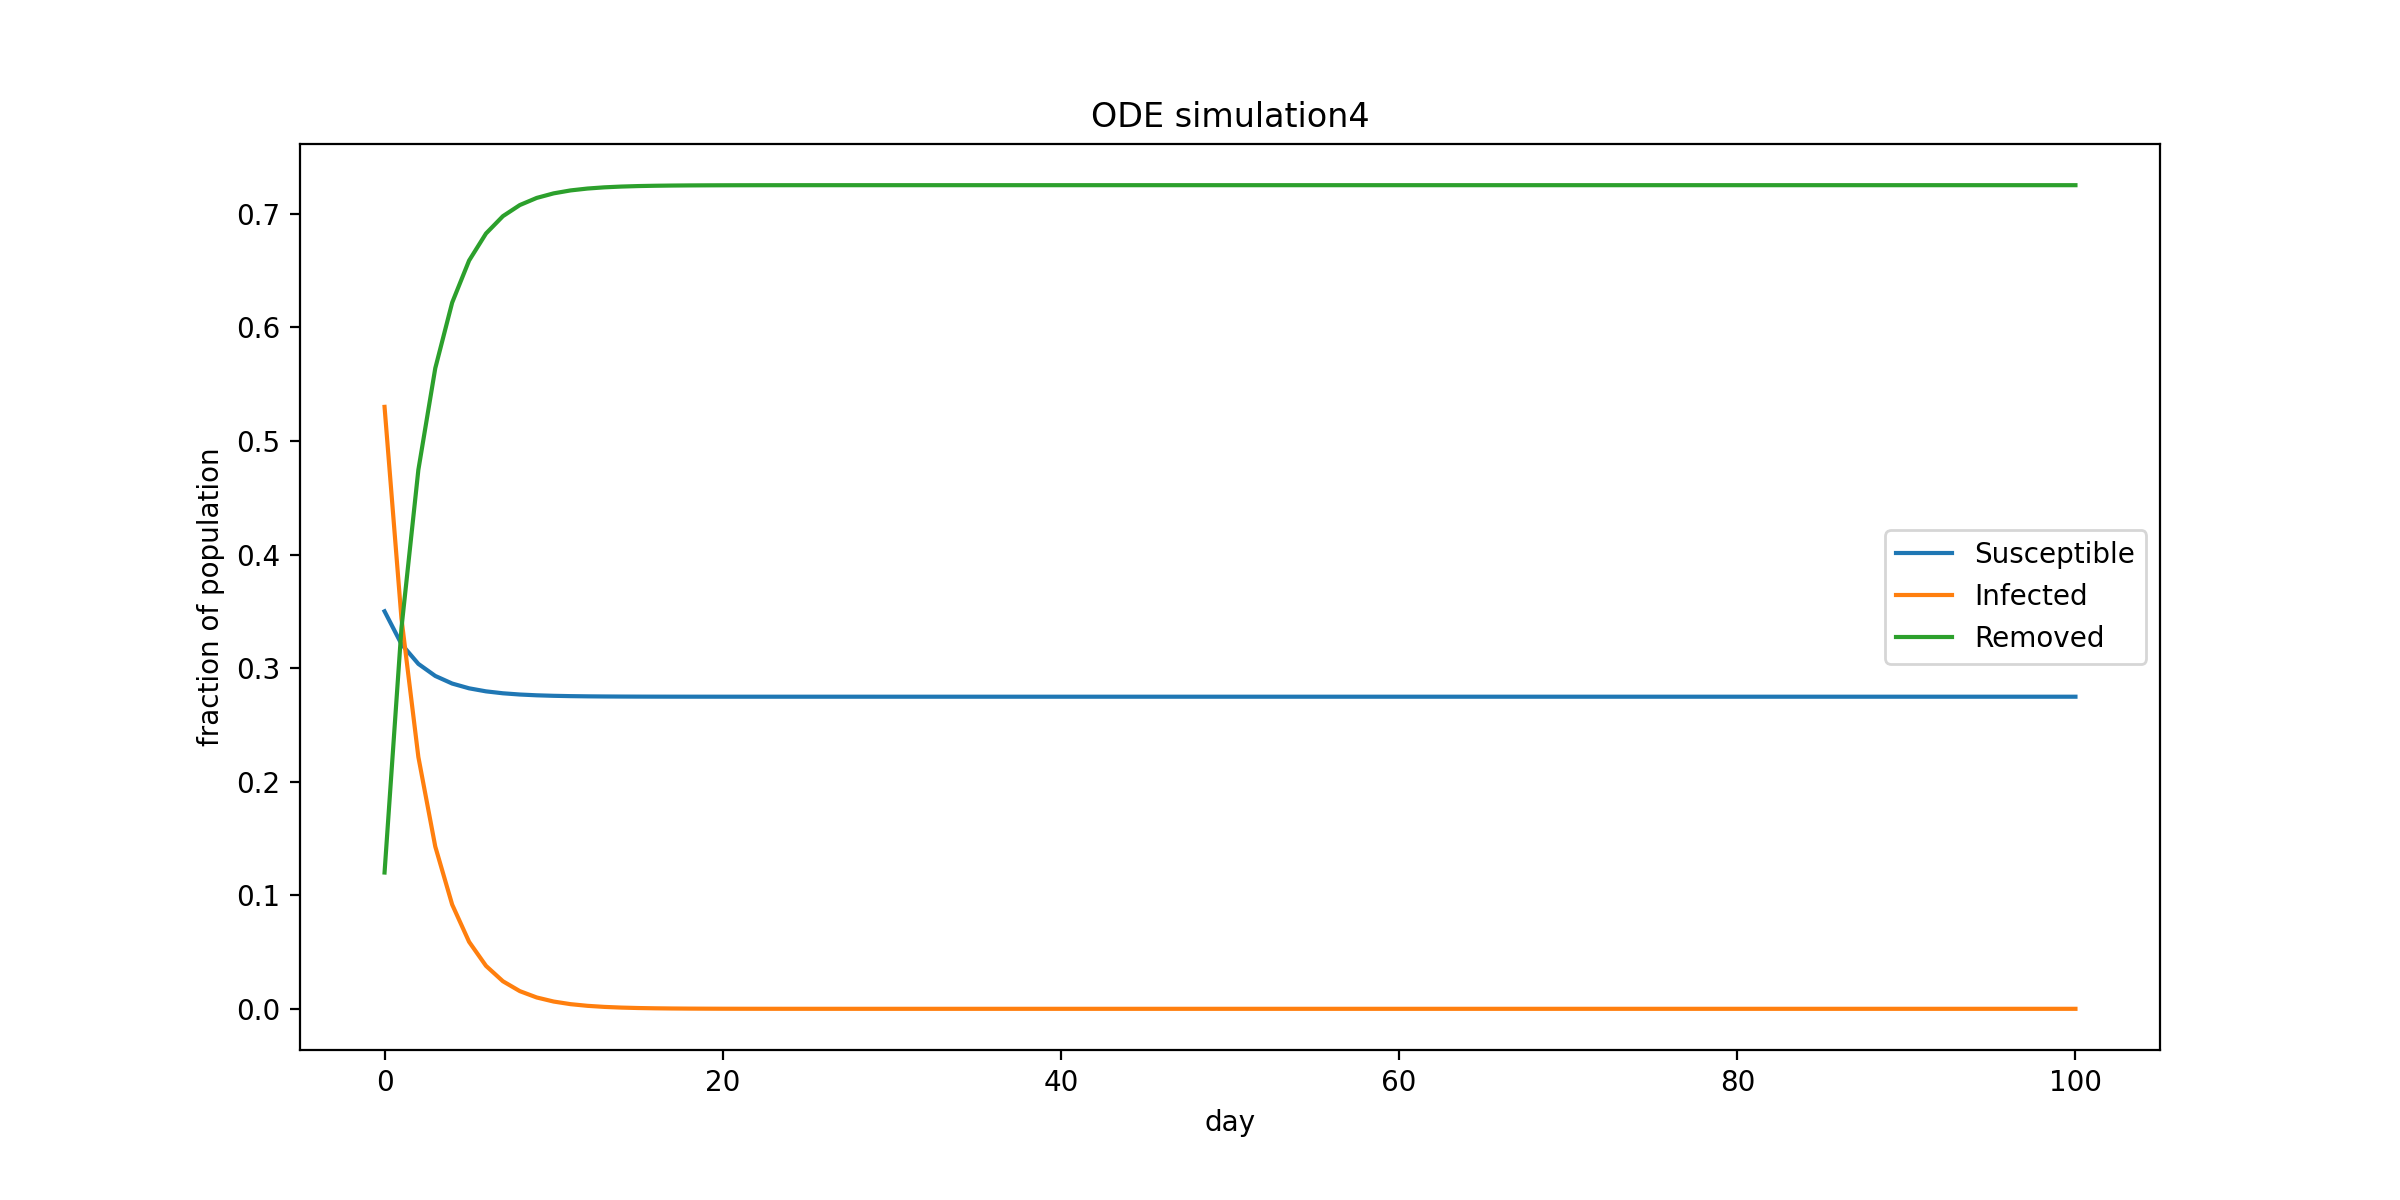

### Simulation 5
The initial values follow as: <br>
`s=0.89` <br>
`i=0.09`<br>
`r=1-s-i`<br>
`b=0.2`   <br>
`k=0.0002` <br>
`day=100`

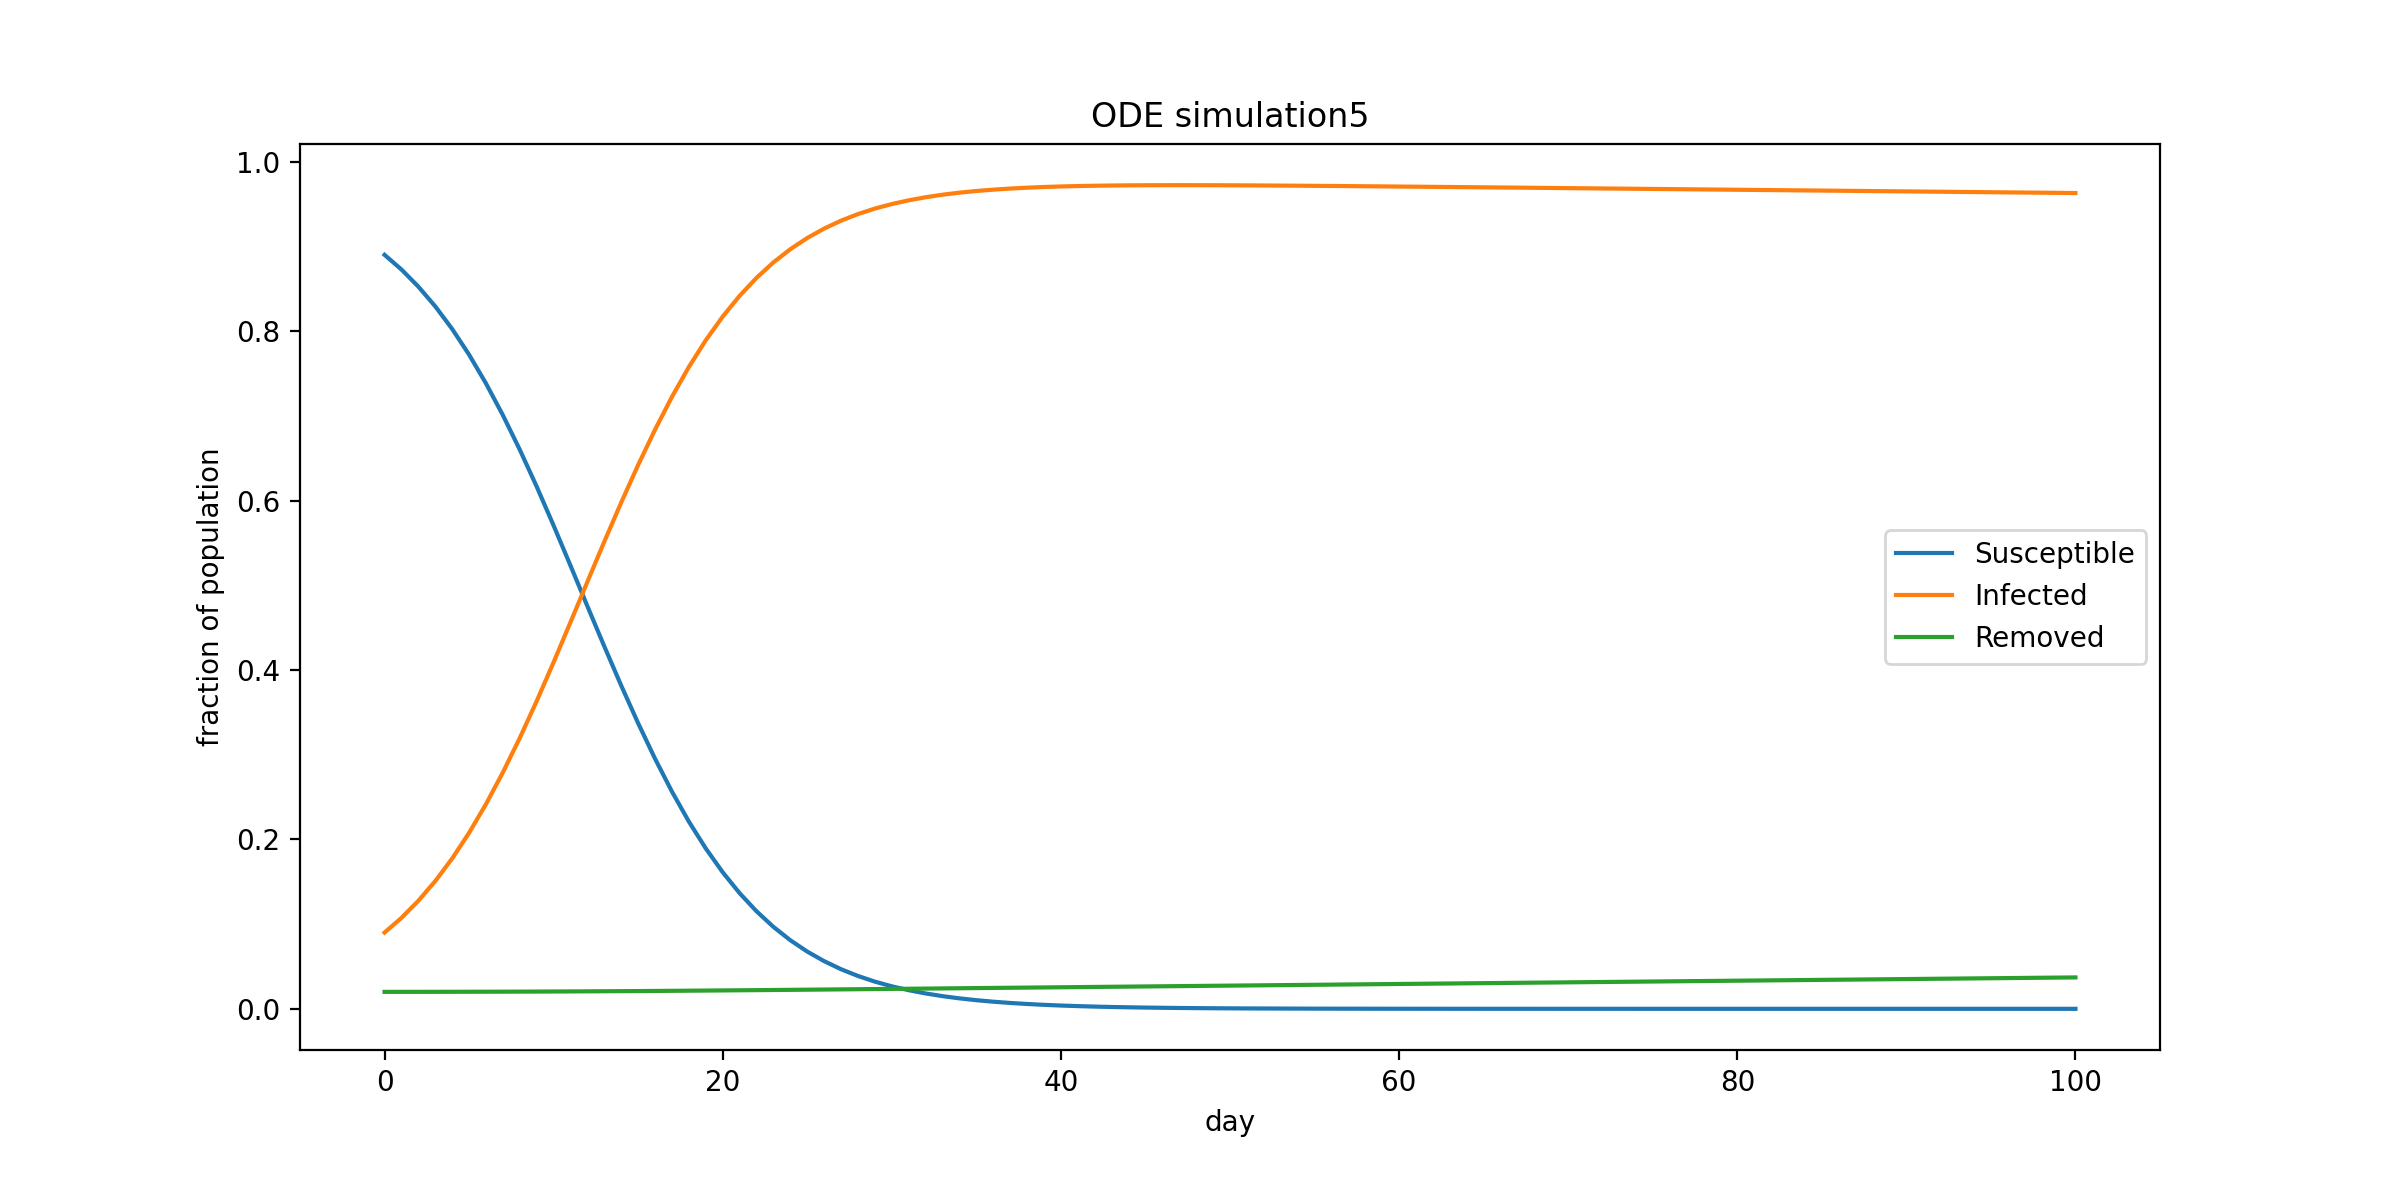

Obeservation:
1. In the first simulation, we applied the same parameter `b` and `k` as in the first discrete case and the result is very much similar, which is desired. 
2. In the second and the third simulations, we choose `b` less than one, which is quite different from the cases in discrete simulations. We then find out the peak of fraction of infected popultion `i` is reached later than the 20th day.
3. In the fourth simulation, `k=0.5` is rather large, and it leads to the infected population recovering quickly and thus `i` goes to zero in less than 10 days.
4. In the fifth simulation, `k=0.0002` is rather small, and it leads to the infected popultion extremely difficult to recover and almost the whole popuulation gets infected in less than 40 days.

### Phase diagram

Similar to the discrete case, we wnat to find how the outcome changes as we change parameters `b` and `k`. We can try to visualize this by counting the fraction of infected people `i` by the end of day `50` while running our simulation on a range of `b` and `k`, and visualize the results in a phase diagram.  

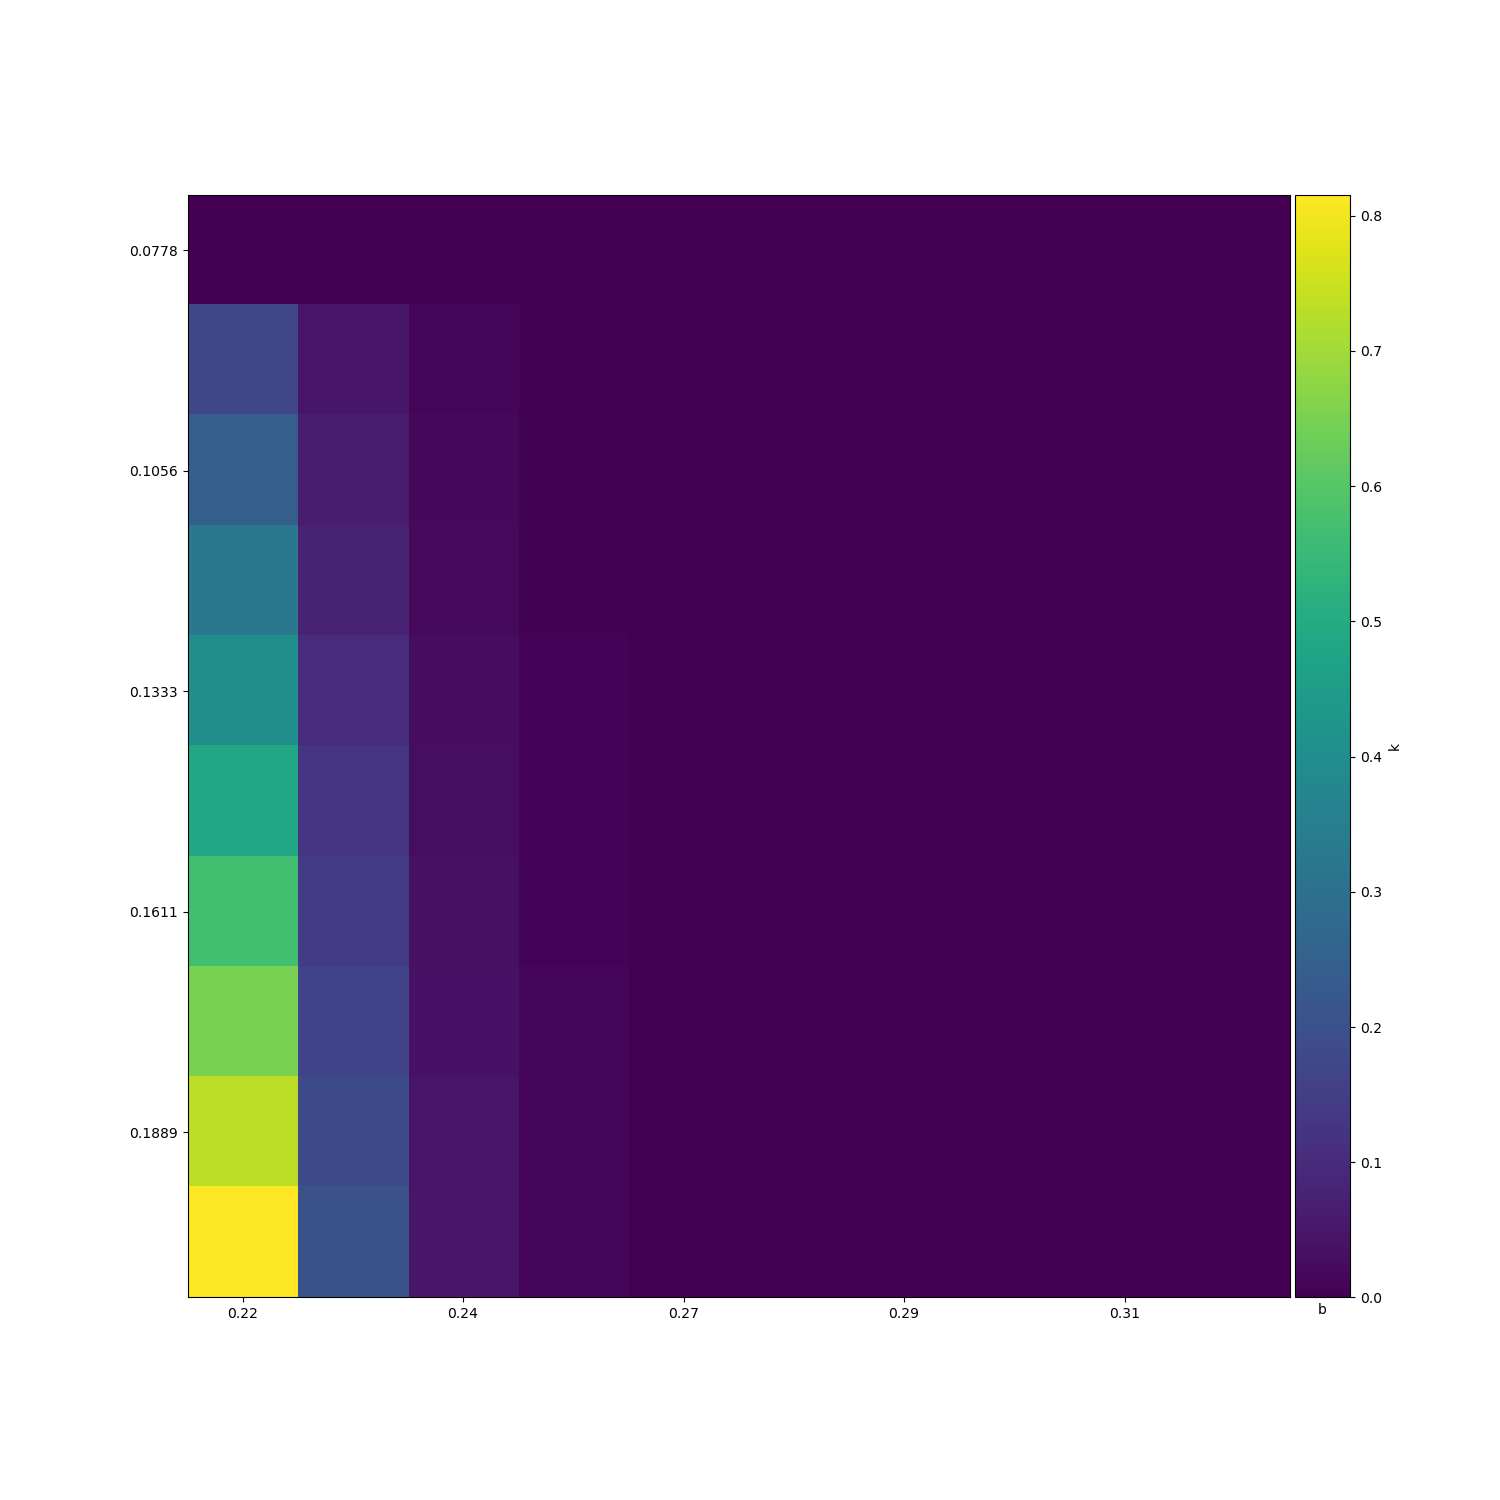

Observation: <br>
 In this example, we choose `b` between `0.2` and `0.4`, which is much smaller than the integer setting in the previous phase diagram. Meanwhile, we also extend the day for observation to `50` instead of `20`. Similarly, the fraction of infected people `i` is higher when both `k` and `b` are small and it matches with the observation in the previous phase diagram.

## 4. Variations

### Variation 1[2]:
A proposed model: the fraction of died people `u` should follow the equation $ \frac{du}{dt} =\mu\cdot i(t)$ Thus, the modified SIR model should be:

 $ \begin{cases}\frac{ds}{dt}= -b \cdot s(t) \cdot i(t)\\ 
 \frac{dr}{dt} = k \cdot i(t)\\
 \frac{di}{dt} = b \cdot s(t) \cdot i(t)-k \cdot i(t)- \mu\cdot i(t)\\
 \frac{du}{dt} =\mu\cdot i(t)\end{cases} $

The initial values follow as:<br>
`b=0.2`<br>
`k=0.08`<br>
`mu = 0.005`<br>
`s=0.92`<br>
`i=0.003`<br>
`r=1-s-i`<br>
`u=0`<br>
`day=200`



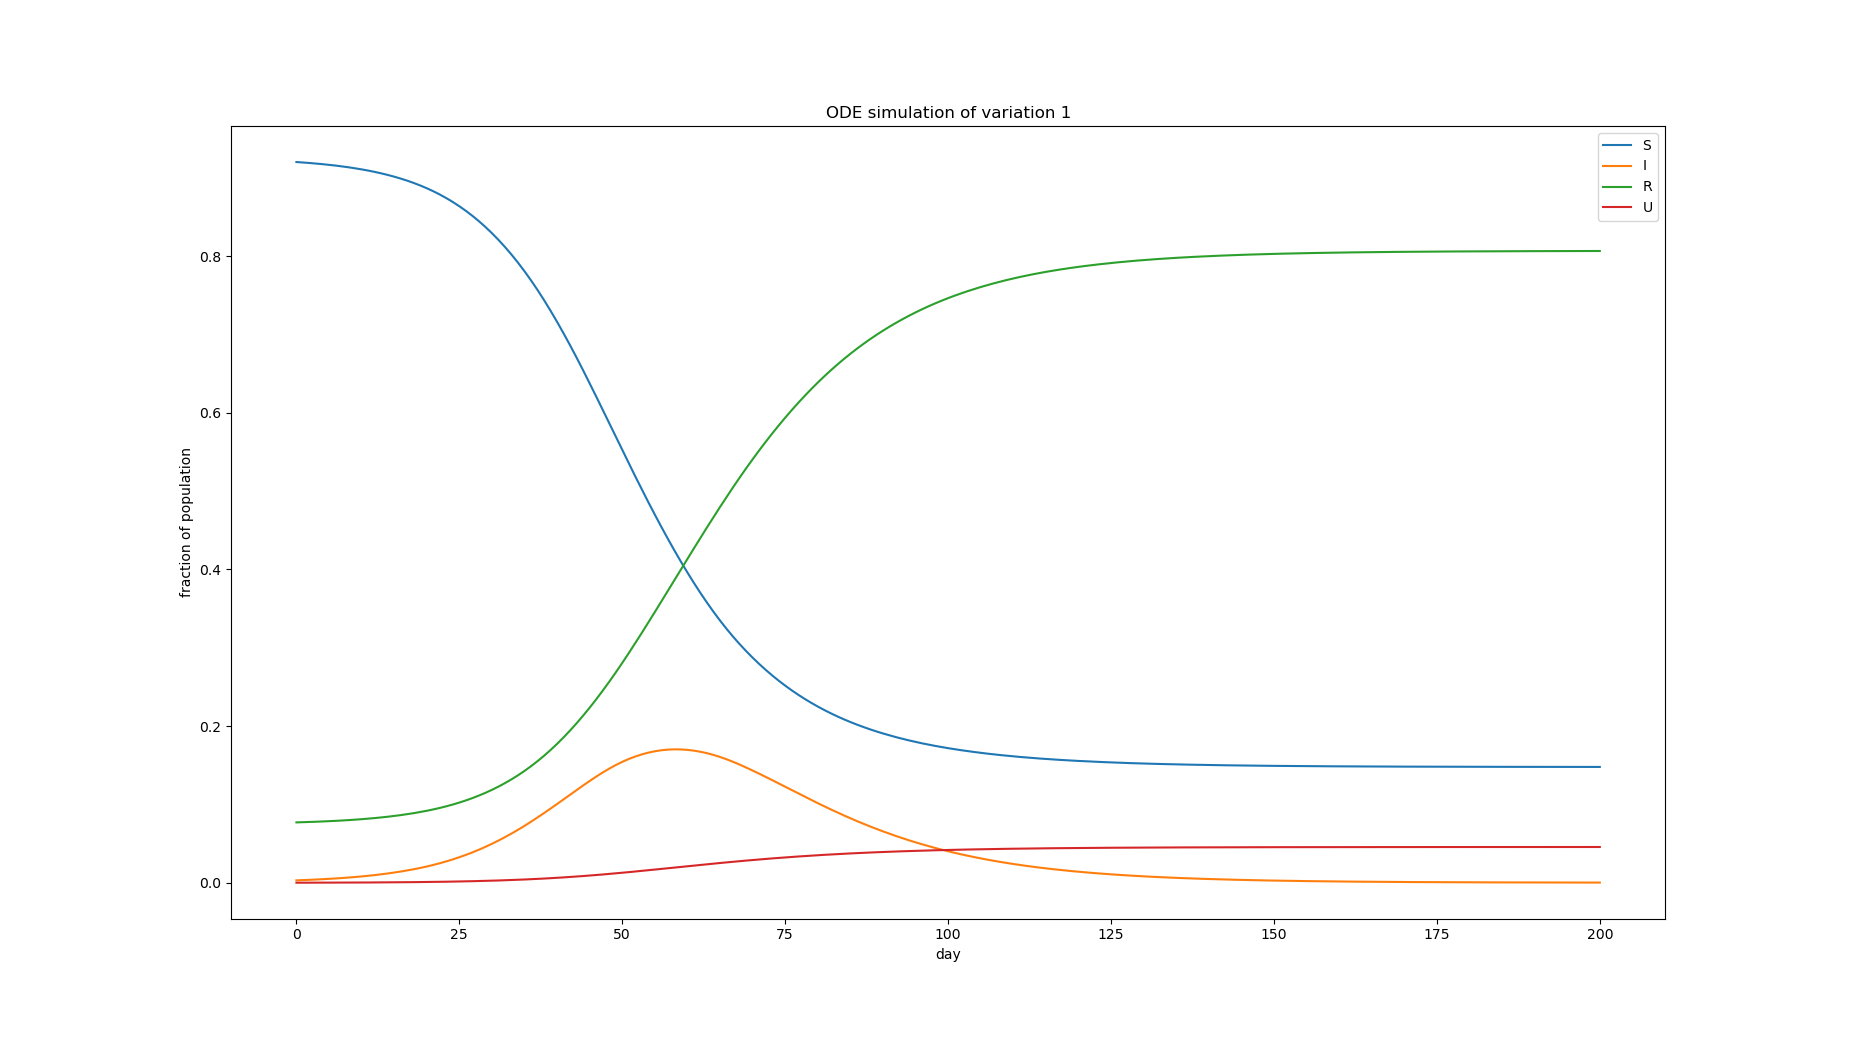

This is the proposed modified SIR model adding the fraction of died people `u` should follow the equation $ \frac{du}{dt} =\mu\cdot i(t)$ 
<br> As we can see from the figure, that the died people gradually increased as time pass by, and finally reach a equilibrium. Other indices like fraction of the infected people and the fraction of the recovered people show the similar curves as the original SIR model with similar parameters of b and k.

### Variation 2 [3]:
A proposed model: We want to consider the effect of vaccination. Define the fraction of population that is vaccinated `v(t)` with `s(t)+i(t)+r(t)+v(t)=1` and define the following equation $ \frac{dv}{dt} =v(t)\cdot s(t)$.  Thus, the modified SIR model should be:

 $\begin{cases}\frac{ds}{dt}= -b \cdot s(t) \cdot i(t)-v(t) \cdot s(t)\\ 
 \frac{dr}{dt} = k \cdot i(t)\\
 \frac{di}{dt} = b \cdot s(t) \cdot i(t)-k \cdot i(t)\\
 \frac{dv}{dt} = v(t)\cdot s(t)\end{cases}$


The initial values follow as:<br>
`b=0.2`<br>
`k=0.08`<br>
`a=0.05`<br>
`s=0.92`<br>
`i=0.003`<br>
`v=0.05`<br>
`r=1-s-i-v`<br>
`day=200`<br>

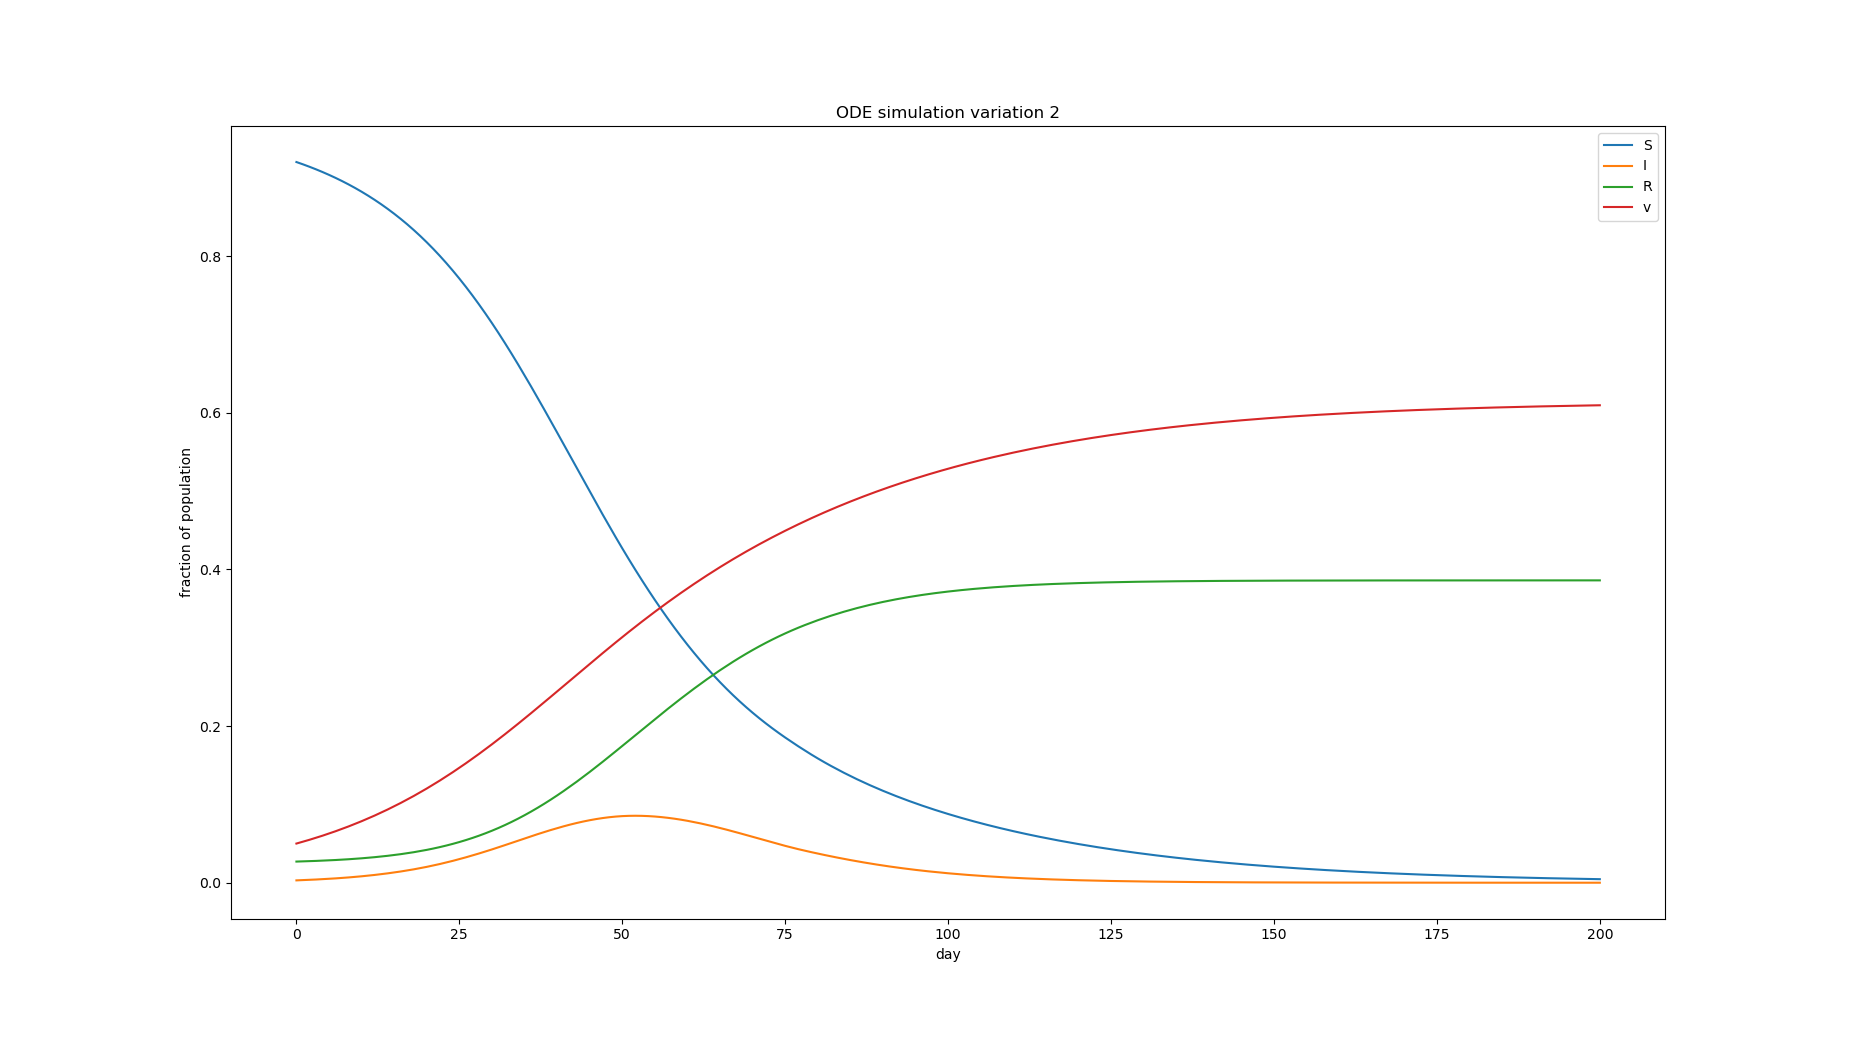

In this case we consider the influence of vaccine with a simple model and assume an individual would not be infected once he or she get vaccinated. The fraction of vaccinated population is rather small at the beginning, but as more people get their vaccine shot, we can see a considerable small increase of the infected population. That is to say, provided the vaccine is reliable, people could get enough protection. Finally, an individual is either vaccinated or recover ($v(t)+r(t) \approx 1$).

## Reference

[0]https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology <br>
[1]An open-data-driven agent-based model to simulate infectious disease outbreaks
Hunter E, Mac Namee B, Kelleher J (2018) An open-data-driven agent-based model to simulate infectious disease outbreaks. PLOS ONE 13(12): e0208775. https://doi.org/10.1371/journal.pone.0208775 <br>
[2]Bailey, Norman T. J. (1975). The mathematical theory of infectious diseases and its applications (2nd ed.). London: Griffin.<br>
[3]Schlickeiser R, Kröger M (2021). "Analytical Modeling of the Temporal Evolution of Epidemics Outbreaks Accounting for Vaccinations". Physics. 3 (2): 386.